# **PH 432: *Exploration of Electrodynamic Simulations, Part 2: Magnetism Project*** by Dan Jang
March 7th, 2024

## **Abstract**
Previously, in *PH 431: Electricity & Magnetism I*, we explored *electric fields*, *potentials*, and *point charges* in our first project, [*Exploration of Electrodynamics Simulations, Part 1: Electricity*](https://github.com/DebuggerDan/ph431-electrodynamic-simulations-project-fall23/).


This second project, [*Exploration of Electrodynamic Simulations, Part 2: Magnetism*](https://github.com/DebuggerDan/ph432-magnetism-simulations-project-winter24/), for *PH 432: Electricity & Magnetism II*, is a continuation into electrodynamics simulations by exploring concepts surrounding *magnetism* and *magnetostatics* – particularly, for these three concepts:


***magnetic field*** (**B**),

***magnetic field strength*** (**H**),

...and ***magnetic monopoles*** and ***multipoles***.


Focusing on ***Chapter 5: Magnetostatics*** & ***Chapter 6: Magnetic Fields in Matter*** from the textbook, *Introduction to Electrodynamics* by David J. Griffiths (1) [[1](https://www.cambridge.org/highereducation/books/introduction-to-electrodynamics/3AB220820DBB628E5A43D52C4B011ED4#overview)], our second project continues our journey into *computational electromagnetism* in the same fashion of our first project, utilizing a *Python*-based, *Project Jupyter Notebook* [[2](https://jupyter.org)] piecewise implementation of *specific electromagnetic phenomena* and *systems* to demonstrate key principles and concepts - where this second project will focus on *magnetism* and *magnetostatics*.


This second project primarily features the novel *Magpylib* [[3](https://github.com/magpylib/magpylib)] library for calculations and visualizations involving *computational magnetism* and *magnetostatics* – as well as the open-sourced *PyVista* [[4](https://github.com/pyvista/pyvista)] library for *3D field-line* computation and visualization. Additionally, prior used libraries from our first project such as *ipywidgets* [[5](https://pypi.org/project/ipywidgets/)] for user-interactive input & *matplotlib.pyplot*'s *streamplot* [[6](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.streamplot.html)].


The goal of this second project is to explore *magnetism* and *magnetostatics* by providing an easy-to-understand introduction to its concepts, through graphical methods, 3D visualizations – to create an easy-to-use computational physics simulator for ***magnetic field*** (**B**), ***magnetic field strength*** (**H**), and ***magnetic monopoles*** and ***multipoles***.

## Part 1: ***Initialization & Setup***

In [2]:
##### PH 432: Exploration of Electrodynamic Simulations, Part 2: Magnetism Project by Dan J.
#### Initialization of Project Libraries, Constants, & Jupyter Notebook

##### Installation:
##### Below code is optional & if running for the first time, try uncommenting & running the code below to install the necessary libraries:
# !pip install pyvista
# !pip install scipy
# !pip install pyvista
# !pip install ipywidgets
# !pip install numpy
# !pip install nbconvert
# !pip install magpylib
# !pip install matplotlib
# !pip install pyvista[all,trame]
# !pip install trame-jupyter-extension
#####

import magpylib as mag
from scipy.constants import mu_0
import pyvista as pv
from ipywidgets import widgets as wd
import numpy as np
from ipywidgets import interactive
import matplotlib as mplotlib
import matplotlib.pyplot as plot
from IPython.display import display, HTML

# import imageio
# from PIL import Image, ImageTk
# import requests
# from io import BytesIO


# ### For Part 4: Point Charges, ffmpeg (https://ffmpeg.org) is used for creating the animated GIF
# def check_for_ffmpeg():
#     ffmpeg_path = imageio.plugins.ffmpeg.get_exe()
    
#     if not os.path.isfile(ffmpeg_path):
#         # print("ffmpeg not found. Please install ffmpeg!")
#         # sys.exit(1)
#         print("Looks like ffmpeg was not found, ergo, downloading ffmpeg (from https://ffmpeg.org/ using the imageio library)")
#         imageio.plugins.ffmpeg.download()
        
#     return ffmpeg_path

# ffmpeg_path = check_for_ffmpeg()


## Part 2: ***Two-Dimensional (2D) Visualization of Magnetic Field (B) & Magnetic Field Strength (H)***

Option set for visualizing Cube!
Option set for visualizing Cylindrical Slice!


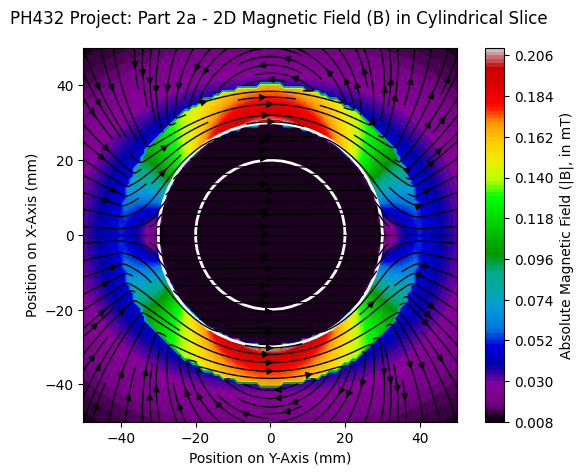

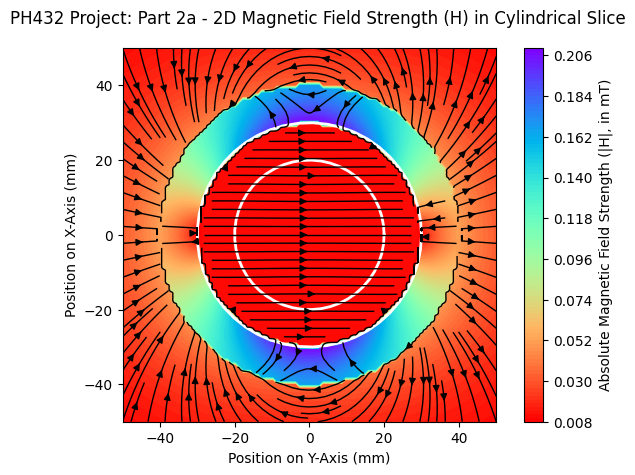

In [14]:
##### PH 432: Exploration of Electrodynamic Simulations, Part 2: Magnetism Project by Dan J.
#### Part 2 - Two-Dimensional (2D) Visualization of Magnetic Field (B) & Magnetic Field Strength (H)
#### Credits to Magpylib Examples (https://magpylib.readthedocs.io/en/latest/_pages/gallery/gallery_tutorial_field_computation.html#gallery-tutorial-field-computation & https://magpylib.readthedocs.io/en/latest/_pages/gallery/gallery_vis_mpl_streamplot.html#gallery-vis-mpl-streamplot)

## Ipywidgets-based input-widget setup!
widgetstyle = {'description_width': 'initial'}
magnetization_x = wd.FloatSlider(min=-1.0, max=1.0, step=0.1, description='X-Magnetization (mT)', style=widgetstyle)
magnetization_y = wd.FloatSlider(min=-1.0, max=1.0, step=0.1, description='Y-Magnetization (mT)', style=widgetstyle)
magnetization_z = wd.FloatSlider(min=-1.0, max=1.0, step=0.1, description='Z-Magnetization (mT)', style=widgetstyle)

## "MagpylibBadUserInput: Input parameter `CylinderSegment.dimension` 
## ...must be array_like of the form (r1, r2, h, phi1, phi2) with 0<=r1<r2, h>0, phi1<phi2 and phi2-phi1<=360,"
dim_r1 = wd.FloatSlider(min=0.01, max=1.0, step=0.01, description='r1 (or x of Cube)')
dim_r2 = wd.FloatSlider(min=0.01, max=1.0, step=0.01, description='r2 (or y of Cube)')
dim_height = wd.FloatSlider(min=-1.0, max=1.0, step=0.01, description='height (m) of Cyl. (or z of Cube)')
dim_phi1 = wd.FloatSlider(min=-360.0, max=360.0, step=1.0, description='φ1 (angle) of Cylindrical Slice')#wd.BoundedFloatText(min=-360.0, max=360.0, value=0, description='φ1 (angle) of Cylindrical Slice', step=1, style=widgetstyle)
dim_phi2 = wd.FloatSlider(min=-360.0, max=360.0, step=1.0, description='φ2 (angle) of Cylindrical Slice')#wd.BoundedFloatText(min=-360.0, max=360.0, value=0, description='φ2 (angle) of Cylindrical Slice', step=1, style=widgetstyle)

gen_button = wd.Button(description='Generate magnetic field (B) & magnetic field strength (H) graphz!')
reset_button = wd.Button(description='Reset')

options_setting = wd.Dropdown(#_setter = wd.Dropdown(
    #options=[('Cylindrical Slice', 1), ('Cube', 2), ('Both! [might be buggy heh)', 3)],
    options=['Cylindrical Slice', 'Cube', '(this might be buggy heh) Both'],
    value='Cylindrical Slice',
    description='Choose the magnet shape(s):',
    disabled=False,
    style=widgetstyle,
)

options_setting_val = 1
dim_phi1.disabled = False
dim_phi2.disabled = False

# options_setting = wd.Dropdown(
#     options=[('Cylindrical Slice', 1), ('Cube', 2), ('Both! [might be buggy heh)', 3)],
#     value=1,
#     description='Choose the magnet shape(s):',
#     disabled=True,
#     style=widgetstyle,
# )

output = wd.Output()

#options_setting

# wd.VBox([
#     wd.HBox([gen_button, reset_button]),
#     output])

## Default widget-inputs!
magnetization_x.value = 0.2
magnetization_y.value = 0.0
magnetization_z.value = 0.0

dim_r1.value = 0.03
dim_r2.value = 0.04
dim_height.value = 0.07
dim_phi1.value = 0
dim_phi2.value = 360
dim_phi1.disabled = False
dim_phi2.disabled = False

options_setting.value = 'Cylindrical Slice'

## Widget helper functions!

def shake_etchasketch(_):
    
    magnetization_x.value = 0.2
    magnetization_y.value = 0.0
    magnetization_z.value = 0.0

    dim_r1.value = 0.03
    dim_r2.value = 0.04
    dim_height.value = 0.07
    dim_phi1.value = 0
    dim_phi2.value = 360
    dim_phi1.disabled = False
    dim_phi2.disabled = False
    global options_setting_val
    options_setting_val = 1
    options_setting.value = 'Cylindrical Slice'
    
    with output:
        refresh(1)
        
def generator_thingy(_):
    
    with output:
        
        refresh(0)

## Credits to https://stackoverflow.com/questions/34020789/ipywidgets-dropdown-widgets-what-is-the-onchange-event & https://github.com/ipython/traitlets
def setting_set(setting):
    #print(str(setting['name']))
    global options_setting_val
    if setting['type'] == 'change' and setting['name'] == 'value':
        print("Option set for visualizing %s!" % setting['new'])
        #options=['Cylindrical Slice', 'Cube', '(this might buggy heh) Both'],
        if setting['new'] == 'Cylindrical Slice':
            options_setting_val = 1
            dim_phi1.disabled = False
            dim_phi2.disabled = False
        elif setting['new'] == 'Cube':
            options_setting_val = 2
            dim_phi1.disabled = True
            dim_phi2.disabled = True
        elif setting['new'] == '(this might be buggy heh) Both':
            options_setting_val = 3
            dim_phi1.disabled = False
            dim_phi2.disabled = False
        else:
            print("Somehow the options_setting_val is not 1, 2, or 3, which is wack")

## Plot displayer function!
def refresh(reset):
    
    output.clear_output(wait=True)
    
    if reset == 1:
        output.clear_output(wait=True)
    
    else:
        # Initial error-checking for the Cylindrical Slice magnet parameters!
        if options_setting_val == 1 or options_setting_val == 3:
            
            if dim_r1.value < 0:
                print("Part 2a.I Error Detected! For the Cylindrical Slice magnet, r1 must be greater than or equal to 0!\nAutomatically setting r1 to 0.01!")
                dim_r1.value = 0.01
                
                if dim_r2.value <= 0.01:
                    print("Part 2a.I Double-Error Detected! For the Cylindrical Slice magnet, r1 must be less than r2!\nSince r1 was just set to 0.01, r2 will be set to 0.02!")
                    dim_r2.value = 0.02
            
            if dim_r1.value >= dim_r2.value:
                # if dim_r1.value == dim_r2.value:
                if dim_r1.value != 0.01:
                    print("Part 2a.I Error Detected! For the Cylindrical Slice magnet, r1 must be less than r2!\nAutomatically decrementing r1 by 0.01!")
                    dim_r1.value = dim_r2.value - 0.01
                else:
                    print("Part 2a.I Error Detected! For the Cylindrical Slice magnet, r1 must be less than r2!\nAutomatically setting both r1 to 0.01 & r2 to 0.02!")
                    dim_r1.value = 0.01
                    dim_r2.value = 0.02
            
            
            if dim_height.value <= 0:
                print("Part 2a.I Error Detected! For the Cylindrical Slice magnet, height must be greater than 0!\nAutomatically incrementing height by 0.01!")
                dim_height.value = dim_height.value + 0.01
            
            if dim_phi1.value >= dim_phi2.value:
                print("Part 2a.I Error Detected! For the Cylindrical Slice magnet, φ1 must be less than φ2!\nAutomatically decrementing φ1 by 1 degree!")
                dim_phi1.value = dim_phi2.value - 1
            
            angle_test = dim_phi2.value - dim_phi1.value
            #if (dim_phi2.value - dim_phi1.value) > 360:
            if angle_test > 360:
                print("Part 2a.I Error Detected! For the Cylindrical Slice magnet, φ2 - φ1 must be less than or equal to 360 degrees!\nAutomatically incrementing φ1 by positive 360 degrees!")
                
                # Self-thoughts for logic-thinkin:
                # phi1,phi2 will both have a minimum of -360 and a maximum of 360
                # therefore, there are two cases here:
                #   case 1: phi2 is some positive (or 0) value <= 360 degrees and phi1 is some negative (or 0) value >= -360 degrees
                #   case 2: phi2 is some negative (or 0) value >= -360 degrees and phi1 is some positive (or 0) value <= 360 degrees
                # however, only case 1: where phi2 is some non-zero positive value <= 360 degrees and phi1 is some non-zero negative value >= -360 degrees
                # ...such that phi2 - phi1 > 360 degrees,
                # ...e.g., like if phi2 = 360 and phi2 = -360, then phi2 - phi1 = 720 degrees > 360 degrees
                # ...or like if phi2 > 180 and/or phi2 < -180, such as if phi2 = 181 and phi2 = -180, then phi2 - phi1 = 361 degrees > 360 degrees
                # 
                # ergo, although we can do diff-checks, the surefire way to prevent error is simply to add positive 360 degrees to phi1, hehe
                
                dim_phi1.value = dim_phi1.value + 360
        
        # If Cylindrical Slice magnet or both!
        if options_setting_val == 1 or options_setting_val == 3:
            plot.close()
            # Create the CylindricalSegment (cylindrical slice) magnet thingy
            ## "MagpylibBadUserInput: Input parameter `CylinderSegment.dimension` must be array_like of the form (r1, r2, h, phi1, phi2) with 0<=r1<r2, h>0, phi1<phi2 and phi2-phi1<=360,"
            cylly_slice = mag.magnet.CylinderSegment(magnetization=(magnetization_x.value, magnetization_y.value, magnetization_z.value), dimension=(dim_r1.value, dim_r2.value, dim_height.value, dim_phi1.value, dim_phi2.value))
            
            # Initialize the observation deck (xy-plane)
            xplot, yplot = np.mgrid[-0.05:0.05:100j, -0.05:0.05:100j].transpose((0, 2, 1))
            observation_deck = np.stack([xplot, yplot, np.zeros((100, 100))], axis=2)
            
            # Awesome analytical method-based magnetic field (B) & magnetic field strength (H) calculation Magpylib functions!
            B = cylly_slice.getB(observation_deck)
            normalized_B = np.linalg.norm(B, axis=2)
            H = cylly_slice.getH(observation_deck)
                    
            figure1, axes = plot.subplots()
            
            contourplot = axes.contourf(
                xplot * 1000, yplot * 1000, normalized_B, levels=100, cmap='nipy_spectral', zorder=1,
            )
            
            streamplot = axes.streamplot(
                xplot * 1000, yplot * 1000, B[:, :, 0], B[:, :, 1], color="k", density=1.5, linewidth=1, zorder=3,
            )
            
            # Colorized measurement value-bar for absolute magnetic field (|B|, in mT)!
            figure1.colorbar(contourplot, ax=axes, label="Absolute Magnetic Field (|B|, in mT)")
            
            # Magnet shape boundary outline thingy
            outline = np.linspace(0, 2 * np.pi, 50)
            axes.plot(30 * np.cos(outline), 30 * np.sin(outline), "w-", lw=2, zorder=2)
            axes.plot(20 * np.cos(outline), 20 * np.sin(outline), "w-", lw=2, zorder=2)
            # axes.plot(dim_r1.value * 1000 * np.cos(outline), dim_r2.value * 1000 * np.sin(outline), 'k', linewidth=2, zorder=2)
            # axes.plot([0, dim_r1.value * 1000 * np.cos(dim_phi1.value * np.pi / 180)], [0, dim_r2.value * 1000 * np.sin(dim_phi1.value * np.pi / 180)], 'k', linewidth=2, zorder=2)
            
            axes.set(
                xlabel="Position on Y-Axis (mm)", ylabel="Position on X-Axis (mm)", aspect=1,
            )
            
            figure1.suptitle('PH432 Project: Part 2a - 2D Magnetic Field (B) in Cylindrical Slice', fontsize=12)
            
            plot.tight_layout()
            plot.savefig("ph432-project-part2a-magfield.png")
            #plot.show()
            
            figure2, axes = plot.subplots()
            
            contourplot = axes.contourf(
                xplot * 1000, yplot * 1000, normalized_B, levels=100, cmap='rainbow_r', zorder=1,
            )
            
            streamplot = axes.streamplot(
                xplot * 1000, yplot * 1000, H[:, :, 0], H[:, :, 1], color="k", density=1.5, linewidth=1, zorder=3,
            )
            
            # Colorized measurement value-bar for absolute magnetic field (|B|, in mT)!
            figure2.colorbar(contourplot, ax=axes, label="Absolute Magnetic Field Strength (|H|, in mT)")
            
            # Magnet shape boundary outline thingy
            outline = np.linspace(0, 2 * np.pi, 50)
            axes.plot(30 * np.cos(outline), 30 * np.sin(outline), "w-", lw=2, zorder=2)
            axes.plot(20 * np.cos(outline), 20 * np.sin(outline), "w-", lw=2, zorder=2)
            # axes.plot(dim_r1.value * 1000 * np.cos(outline), dim_r2.value * 1000 * np.sin(outline), 'k', linewidth=2, zorder=2)
            # axes.plot([0, dim_r1.value * 1000 * np.cos(dim_phi1.value * np.pi / 180)], [0, dim_r2.value * 1000 * np.sin(dim_phi1.value * np.pi / 180)], 'k', linewidth=2, zorder=2)
            
            axes.set(
                xlabel="Position on Y-Axis (mm)", ylabel="Position on X-Axis (mm)", aspect=1,
            )
            
            figure2.suptitle('PH432 Project: Part 2a - 2D Magnetic Field Strength (H) in Cylindrical Slice', fontsize=12)
            
            plot.tight_layout()
            plot.savefig("ph432-project-part2a-magstrength.png")
            #plot.show()
            
            # with output:
            #     display(figure1, figure2)

        # If cube magnet or both!
        if options_setting_val == 2 or options_setting_val == 3:
            if dim_height.value <= 0:
                print("Part 2b.I Error Detected! For the Cube magnet, height must be greater than 0!\nAutomatically setting height to 0.01!")
                dim_height.value = 0.01
            
            plot.close()
            figure3, [axe31, axe32] = plot.subplots(1, 2, figsize=(10,5))
            
            xyz = np.linspace(-0.05, 0.05, 40)
            observation_deck2 = np.array([[(x, 0, z) for x in xyz] for z in xyz])
            
            # Create the Cuboid (cube) magnet thingy
            ## Sanity Debug #1
            #print(magnetization_x.value, magnetization_y.value, magnetization_z.value, dim_r1.value, dim_r2.value, dim_height.value)
            
            cube = mag.magnet.Cuboid(magnetization=(magnetization_x.value, magnetization_y.value, magnetization_z.value), dimension=(dim_r1.value, dim_r2.value, dim_height.value))
            
            # Awesome analytical method-based magnetic field (B) & magnetic field strength (H) calculation Magpylib functions!
            B = cube.getB(observation_deck2)
            normalized_B_color = np.log10(np.linalg.norm(B, axis=2))
            H = cube.getH(observation_deck2)
            
            # Plot streamplot of magnetic field (B) of cube magnet!
            axe31.streamplot(
                observation_deck2[:, :, 0] * 1000, observation_deck2[:, :, 2] * 1000, B[:, :, 0], B[:, :, 2], density=1, cmap='copper_r', color=normalized_B_color, linewidth=1,
            )
            
            # Plot streamplot of magnetic field strength (H) of cube magnet!
            axe32.streamplot(
                observation_deck2[:, :, 0] * 1000, observation_deck2[:, :, 2] * 1000, H[:, :, 0], H[:, :, 2], density=1, cmap='copper_r', color=normalized_B_color, linewidth=1,
            )
        
            # Plot cube magnet shape boundary outline thingy
            for axez in [axe31, axe32]:
                axez.plot(
                    np.array([1, 1, -1, -1, 1]) * 10, np.array([1, -1, -1, 1, 1]) * 10, "k--", lw=2,
                )
            
            axe31.set(
                title="Cube Magnetic Field (B)", xlabel="Position on Y-Axis (mm)", ylabel="Position on X-Axis (mm)",
            )
            
            axe32.set(
                title="Cube Magnetic Field Strength (H)", xlabel="Position on Y-Axis (mm)", ylabel="Position on X-Axis (mm)", aspect=1,
            )
            
            figure3.suptitle('PH432 Project: Part 2b - 2D Magnetic Field (B) & Strength (H) in Cube Magnet', fontsize=12)
            plot.tight_layout()
            plot.savefig("ph432-project-part2b-cube.png")
            #plot.show()
        
    # Custom option-based output!
    #if reset == 0:#options_setting.value == 3 and reset == 0:
        if options_setting_val == 3:
            with output:
                display(figure1, figure2, figure3)
        
        elif options_setting_val == 1:
            with output:
                display(figure1, figure2)
        
        elif options_setting_val == 2:
            with output:
                display(figure3)
        
        else:
            print("[PH432 Project Debug #1]: Somehow the options_setting_val is not 1, 2, or 3, which is wack")

# cylly_slice = mag.magnet.CylinderSegment(magnetization=(magnetization_x.value, magnetization_y.value, magnetization_z.value), dimension=(dim_r1.value, dim_r2.value, dim_height.value, dim_phi1.value, dim_phi2.value))

## Widget button mapping!
options_setting.observe(setting_set)
gen_button.on_click(generator_thingy)#refresh(reset=0))
reset_button.on_click(shake_etchasketch)#refresh(reset=1))


## Widgets layout!

wd.VBox([
    wd.HBox([magnetization_x, magnetization_y, magnetization_z]),
    wd.HBox([dim_r1, dim_r2]),
    wd.HBox([dim_height]),
    wd.HBox([dim_phi1, dim_phi2]),
    wd.HBox([options_setting]),
    wd.HBox([gen_button]),
    wd.HBox([reset_button]),
    output
    ])


## Part 3: ***Three-Dimensional (3D) Visualization of Magnetic Field Lines (B)***

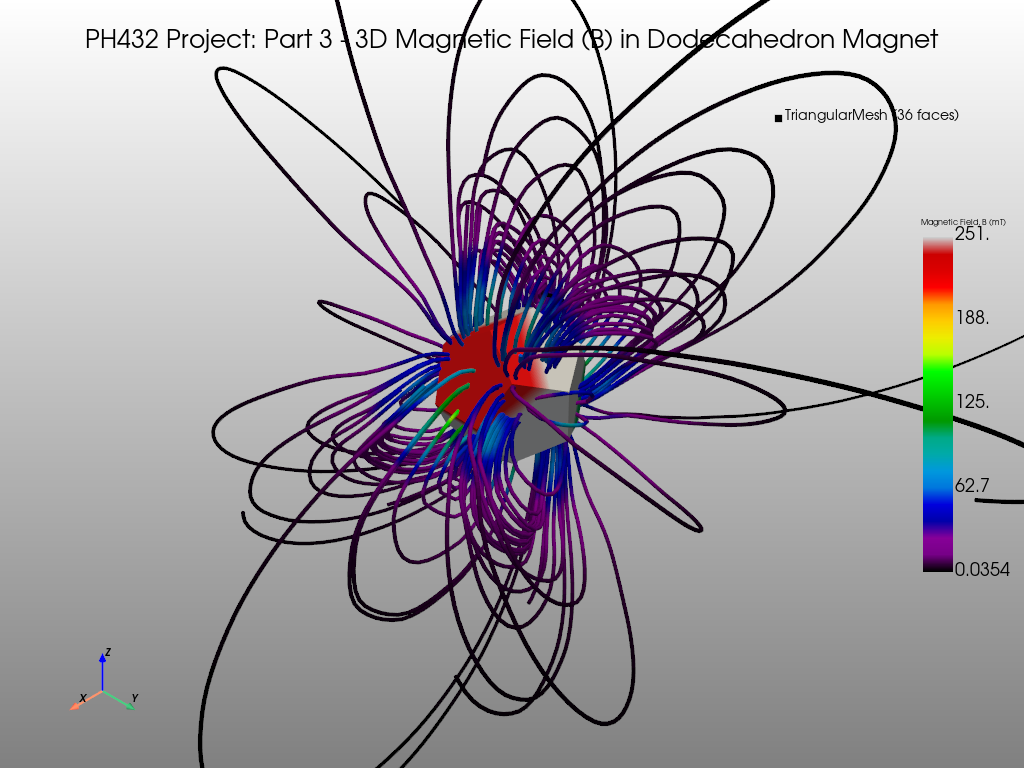

In [10]:
##### PH 432: Exploration of Electrodynamic Simulations, Part 2: Magnetism Project by Dan J.
#### Part 3 - Three-Dimensional (3D) Visualization of Magnetic Field Lines (B)
#### Credits to Magpylib Example (https://magpylib.readthedocs.io/en/latest/_pages/gallery/gallery_vis_pv_streamlines.html#gallery-vis-pv-streamlines)

#pv.start_xvfb()
#pv.global_theme.trame.jupyter_extension_enabled = True
pv.set_jupyter_backend('trame')

## Ipywidgets-based input-widget setup!
widgetstyle = {'description_width': 'initial'}
magnetization_x = wd.FloatSlider(min=-1.0, max=1.0, step=0.01, description='X-Magnetization (mT)', style=widgetstyle)
magnetization_y = wd.FloatSlider(min=-1.0, max=1.0, step=0.01, description='Y-Magnetization (mT)', style=widgetstyle)
magnetization_z = wd.FloatSlider(min=-1.0, max=1.0, step=0.01, description='Z-Magnetization (mT)', style=widgetstyle)

dodecahedron_radius = wd.FloatSlider(min=0.0001, max=10.0, step=0.0001, description='Dodecahedron Radius (m)', style=widgetstyle)

## "MagpylibBadUserInput: Input parameter `CylinderSegment.dimension` 
## ...must be array_like of the form (r1, r2, h, phi1, phi2) with 0<=r1<r2, h>0, phi1<phi2 and phi2-phi1<=360,"
# dim_x = wd.BoundedFloatText(value=41, min=10.0, max=500.0, step=1, description='x-dimension of xyz-plane', style=widgetstyle)
# dim_y = wd.BoundedFloatText(value=41, min=10.0, max=500.0, step=0.01, description='y-dimension of xyz-plane', style=widgetstyle)
# dim_z = wd.BoundedFloatText(value=41, min=10.0, max=.0, step=0.01, description='z-dimension of xyz-plane', style=widgetstyle)

dim_grid1 = wd.BoundedIntText(value=41, min=1, max=500, step=1, description='x-dimension of xyz-plane', style=widgetstyle)
dim_grid2 = wd.BoundedIntText(value=41, min=1, max=500, step=1, description='y-dimension of xyz-plane', style=widgetstyle)
dim_grid3 = wd.BoundedIntText(value=41, min=1, max=500, step=1, description='z-dimension of xyz-plane', style=widgetstyle)

# dim_space1 = wd.FloatSlider(min=0.0001, max=1.0, step=0.0001, description='x-spacing of xyz-plane')
# dim_space2 = wd.FloatSlider(min=0.0001, max=1.0, step=0.0001, description='y-spacing of xyz-plane')
# dim_space3 = wd.FloatSlider(min=0.0001, max=1.0, step=0.0001, description='z-spacing of xyz-plane')

dim_space1 = wd.BoundedFloatText(value=0.001, min=0.0001, max=10.0, step=0.0001, description='x-spacing of xyz-plane', style=widgetstyle)
dim_space2 = wd.BoundedFloatText(value=0.001, min=0.0001, max=10.0, step=0.0001, description='y-spacing of xyz-plane', style=widgetstyle)
dim_space3 = wd.BoundedFloatText(value=0.001, min=0.0001, max=10.0, step=0.0001, description='z-spacing of xyz-plane', style=widgetstyle)

# dim_o1 = wd.FloatSlider(min=-360.0, max=360.0, step=1.0, description='x-origin of xyz-plane')#wd.BoundedFloatText(min=-360.0, max=360.0, value=0, description='φ1 (angle) of Cylindrical Slice', step=1, style=widgetstyle)
# dim_o2 = wd.FloatSlider(min=-360.0, max=360.0, step=1.0, description='y-origin of xyz-plane')#wd.BoundedFloatText(min=-360.0, max=360.0, value=0, description='φ2 (angle) of Cylindrical Slice', step=1, style=widgetstyle)
# dim_o3 = wd.FloatSlider(min=-360.0, max=360.0, step=1.0, description='y-origin of xyz-plane')#wd.BoundedFloatText(min=-360.0, max=360.0, value=0, description='φ2 (angle) of Cylindrical Slice', step=1, style=widgetstyle)

dim_o1 = wd.BoundedFloatText(value=-0.02, min=-500.0, max=500.0, step=0.01, description='x-origin of xyz-plane', style=widgetstyle)
dim_o2 = wd.BoundedFloatText(value=-0.02, min=-500.0, max=500.0, step=0.01, description='y-origin of xyz-plane', style=widgetstyle)
dim_o3 = wd.BoundedFloatText(value=-0.02, min=-500.0, max=500.0, step=0.01, description='z-origin of xyz-plane', style=widgetstyle)

count_radial = wd.IntSlider(value=1, min=0, max=100, step=1, description='# of Radial Field Lines', style=widgetstyle)
count_circumferential = wd.IntSlider(value=9, min=0, max=100, step=1, description='# of Circumferential Field Lines', style=widgetstyle)

dim_cam1 = wd.BoundedFloatText(value=0.010, min=-500.0, max=500.0, step=0.01, description='x-observation coord', style=widgetstyle)
dim_cam2 = wd.BoundedFloatText(value=0.010, min=-500.0, max=500.0, step=0.01, description='y-observation coord', style=widgetstyle)
dim_cam3 = wd.BoundedFloatText(value=0.010, min=-500.0, max=500.0, step=0.01, description='z-observation coord', style=widgetstyle)

interactive_check = wd.Checkbox(
    value=False,
    description='Enable Buggy <can crash> Interactive 3D Display?',
    disabled=False,
    indent=False,
    style=widgetstyle,
)

gen_button = wd.Button(description='Generate 3D Dodecahedron Magnetic Field (B, in mT) Lines!', style=widgetstyle)
reset_button = wd.Button(description='Reset', style=widgetstyle)

#output = wd.Output()

## Default widget-inputs!
magnetization_x.value = 0.27
magnetization_y.value = 0.0
magnetization_z.value = 0.27

dodecahedron_radius.value = 0.001

dim_grid1.value = 41
dim_grid2.value = 41
dim_grid3.value = 41

dim_space1.value = 0.001
dim_space2.value = 0.001
dim_space3.value = 0.001

dim_o1.value = -0.02
dim_o2.value = -0.02
dim_o3.value = -0.02

count_radial.value = 1
count_circumferential.value = 9

dim_cam1.value = 0.010
dim_cam2.value = 0.010
dim_cam3.value = 0.010
interactive_check.value = False

coolplot, coolplotfigure = None, None

## Sanity Debug #2a - Print all input parameters
# print("[#1]", magnetization_x.value, magnetization_y.value, magnetization_z.value, dodecahedron_radius.value, dim_grid1.value, dim_grid2.value, dim_grid3.value, dim_space1.value, dim_space2.value, dim_space3.value, dim_o1.value, dim_o2.value, dim_o3.value, count_radial.value, count_circumferential.value, dim_cam1.value, dim_cam2.value, dim_cam3.value)

## Widget helper functions!

def shake_etchasketch(_):
    
    magnetization_x.value = 0.27
    magnetization_y.value = 0.0
    magnetization_z.value = 0.27

    dodecahedron_radius.value = 0.001

    dim_grid1.value = 41
    dim_grid2.value = 41
    dim_grid3.value = 41

    dim_space1.value = 0.001
    dim_space2.value = 0.001
    dim_space3.value = 0.001

    dim_o1.value = -0.02
    dim_o2.value = -0.02
    dim_o3.value = -0.02

    count_radial.value = 1
    count_circumferential.value = 9

    dim_cam1.value = 0.010
    dim_cam2.value = 0.010
    dim_cam3.value = 0.010
    interactive_check.value = False
    
    global coolplot, coolplotfigure
    coolplot, coolplotfigure = None, None
    
    #refresh(1)
        
def generator_thingy(_):
    
    refresh(0)

## Plot displayer function!
def refresh(reset):
    
    #output.clear_output(wait=False)
    
    # if reset == 1:
    #     #plot.clear()
    #     output.clear_output(wait=False)
    
    #else:
    global coolplot, coolplotfigure
    
    ## Sanity Debug #2b - Print all input parameters
    # print("[#2]", magnetization_x.value, magnetization_y.value, magnetization_z.value, dodecahedron_radius.value, dim_grid1.value, dim_grid2.value, dim_grid3.value, dim_space1.value, dim_space2.value, dim_space3.value, dim_o1.value, dim_o2.value, dim_o3.value, count_radial.value, count_circumferential.value, dim_cam1.value, dim_cam2.value, dim_cam3.value)
    
    dodecahedron = pv.Dodecahedron(radius=dodecahedron_radius.value)
    
    cool_magnet = mag.magnet.TriangularMesh.from_pyvista(
        magnetization=(magnetization_x.value, magnetization_y.value, magnetization_z.value),
        polydata=dodecahedron,
    )
    
    observation_table = pv.ImageData(
        dimensions=(dim_grid1.value, dim_grid2.value, dim_grid3.value),
        spacing=(dim_space1.value, dim_space2.value, dim_space3.value),
        origin=(dim_o1.value, dim_o2.value, dim_o3.value),
    )
    
    observation_table["B"] = cool_magnet.getB(observation_table.points) * 1000
    
    # Field-line setup with user-input parameters!
    seed = pv.Disc(inner=dodecahedron_radius.value, outer=(dodecahedron_radius.value*3), r_res=count_radial.value, c_res=count_circumferential.value)
    fieldline_stream = observation_table.streamlines_from_source(
        seed, vectors="B", max_step_length=0.1, max_time=.02, integration_direction="both",
    )
    
    ## Sanity Debug #2c - Print all input parameters
    # print("[#3]", magnetization_x.value, magnetization_y.value, magnetization_z.value, dodecahedron_radius.value, dim_grid1.value, dim_grid2.value, dim_grid3.value, dim_space1.value, dim_space2.value, dim_space3.value, dim_o1.value, dim_o2.value, dim_o3.value, count_radial.value, count_circumferential.value, dim_cam1.value, dim_cam2.value, dim_cam3.value)
    
    coolplot = pv.Plotter(notebook=True)
    
    mag.show(cool_magnet, canvas=coolplot, backend="pyvista")
    ## Sanity Debug #2d - Print all input parameters
    # print("[#4]", magnetization_x.value, magnetization_y.value, magnetization_z.value, dodecahedron_radius.value, dim_grid1.value, dim_grid2.value, dim_grid3.value, dim_space1.value, dim_space2.value, dim_space3.value, dim_o1.value, dim_o2.value, dim_o3.value, count_radial.value, count_circumferential.value, dim_cam1.value, dim_cam2.value, dim_cam3.value)
    
    coolplotbarargs = {
        "title": "Magnetic Field, B (mT)",
        "title_font_size": 8,
        "color": "black",
        "position_y": 0.25,
        "vertical": True,
    }
    ## Sanity Debug #2e - Print all input parameters
    # print("[#5]", magnetization_x.value, magnetization_y.value, magnetization_z.value, dodecahedron_radius.value, dim_grid1.value, dim_grid2.value, dim_grid3.value, dim_space1.value, dim_space2.value, dim_space3.value, dim_o1.value, dim_o2.value, dim_o3.value, count_radial.value, count_circumferential.value, dim_cam1.value, dim_cam2.value, dim_cam3.value)
    
    tube_radius = dodecahedron_radius.value / 40
    
    coolplot.add_mesh(
        fieldline_stream.tube(radius=(tube_radius)),
        cmap="nipy_spectral",
        scalar_bar_args=coolplotbarargs,
    )
    ## Sanity Debug #2f - Print all input parameters
    # print("[#6]", magnetization_x.value, magnetization_y.value, magnetization_z.value, dodecahedron_radius.value, dim_grid1.value, dim_grid2.value, dim_grid3.value, dim_space1.value, dim_space2.value, dim_space3.value, dim_o1.value, dim_o2.value, dim_o3.value, count_radial.value, count_circumferential.value, dim_cam1.value, dim_cam2.value, dim_cam3.value)
    
    coolplot.add_title("PH432 Project: Part 3 - 3D Magnetic Field (B) in Dodecahedron Magnet", font_size=10)
    coolplot.camera.position = (dim_cam1.value, dim_cam2.value, dim_cam3.value)
    ## Sanity Debug #2g - Print all input parameters
    # print("[#7]", magnetization_x.value, magnetization_y.value, magnetization_z.value, dodecahedron_radius.value, dim_grid1.value, dim_grid2.value, dim_grid3.value, dim_space1.value, dim_space2.value, dim_space3.value, dim_o1.value, dim_o2.value, dim_o3.value, count_radial.value, count_circumferential.value, dim_cam1.value, dim_cam2.value, dim_cam3.value)
    
    #coolplot.show(jupyter_backend='trame', auto_close=False)#, screenshot="ph432-project-part3-dodecahedron.png")
    # coolplot.show(jupyter_backend='html', interactive=True, auto_close=False)#screenshot="ph432-project-part3-dodecahedron-html.png")
    # coolplot.screenshot(filename="ph432-project-part3-dodecahedron.png")
    # coolplot.close()
    if interactive_check.value == True:
        coolplot.show(jupyter_backend='html', interactive=True, auto_close=False)#screenshot="ph432-project-part3-dodecahedron-html.png")
        coolplot.screenshot(filename="ph432-project-part3-dodecahedron-html.png")
        coolplot.close()
    elif interactive_check.value == False:
        coolplot.show(jupyter_backend='static', auto_close=False)
        coolplot.screenshot(filename="ph432-project-part3-dodecahedron.png")
        coolplot.close()
    #coolplot.show(screenshot="ph432-project-part3-dodecahedron.png")
    #coolplot.show(jupyter_backend='trame', auto_close=False)
    #coolplot.screenshot(filename="ph432-project-part3-dodecahedron.png")#, auto_close=False)
    ## Sanity Debug #2h - Print all input parameters
    # print("[#8]", magnetization_x.value, magnetization_y.value, magnetization_z.value, dodecahedron_radius.value, dim_grid1.value, dim_grid2.value, dim_grid3.value, dim_space1.value, dim_space2.value, dim_space3.value, dim_o1.value, dim_o2.value, dim_o3.value, count_radial.value, count_circumferential.value, dim_cam1.value, dim_cam2.value, dim_cam3.value)
    #coolplot.close()
    ## Sanity Debug #2i - Print all input parameters
    # print("[#9]", magnetization_x.value, magnetization_y.value, magnetization_z.value, dodecahedron_radius.value, dim_grid1.value, dim_grid2.value, dim_grid3.value, dim_space1.value, dim_space2.value, dim_space3.value, dim_o1.value, dim_o2.value, dim_o3.value, count_radial.value, count_circumferential.value, dim_cam1.value, dim_cam2.value, dim_cam3.value)
    #coolplot.screenshot(filename="ph432-project-part3-dodecahedron.png")
    #coolplot.show(screenshot="ph432-project-part3-dodecahedron.png", auto_close=False)
    #coolplot.show(screenshot="ph432-project-part3-dodecahedron.png", auto_close=False)
    #coolplotfigure = coolplot.show(auto_close=False)
    

    #display(coolplot.show(auto_close=False))

    #coolplot.screenshot(filename="ph432-project-part3-dodecahedron.png")


# cylly_slice = mag.magnet.CylinderSegment(magnetization=(magnetization_x.value, magnetization_y.value, magnetization_z.value), dimension=(dim_r1.value, dim_r2.value, dim_height.value, dim_phi1.value, dim_phi2.value))

## Widget button mapping!
gen_button.on_click(generator_thingy)
reset_button.on_click(shake_etchasketch)

## Widgets layout!
# magnetization_x = wd.FloatSlider(min=-1.0, max=1.0, step=0.01, description='X-Magnetization (mT)', style=widgetstyle)
# magnetization_y = wd.FloatSlider(min=-1.0, max=1.0, step=0.01, description='Y-Magnetization (mT)', style=widgetstyle)
# magnetization_z = wd.FloatSlider(min=-1.0, max=1.0, step=0.01, description='Z-Magnetization (mT)', style=widgetstyle)
# dodecahedron_radius = wd.FloatSlide(min=0.0001, max=10.0, step=0.0001, description='Dodecahedron Radius (m)', style=widgetstyle)
# dim_grid1 = wd.BoundedIntText(value=41, min=1, max=500, step=1, description='x-dimension of xyz-plane', style=widgetstyle)
# dim_grid2 = wd.BoundedIntText(value=41, min=1, max=500, step=1, description='y-dimension of xyz-plane', style=widgetstyle)
# dim_grid3 = wd.BoundedIntText(value=41, min=1, max=500, step=1, description='z-dimension of xyz-plane', style=widgetstyle)
# dim_space1 = wd.BoundedFloatText(value=0.001, min=0.0001, max=10.0, step=0.0001, description='x-spacing of xyz-plane', style=widgetstyle)
# dim_space2 = wd.BoundedFloatText(value=0.001, min=0.0001, max=10.0, step=0.0001, description='y-spacing of xyz-plane', style=widgetstyle)
# dim_space3 = wd.BoundedFloatText(value=0.001, min=0.0001, max=10.0, step=0.0001, description='z-spacing of xyz-plane', style=widgetstyle)
# dim_o1 = wd.BoundedFloatText(value=-0.02, min=-500.0, max=500.0, step=0.01, description='x-origin of xyz-plane', style=widgetstyle)
# dim_o2 = wd.BoundedFloatText(value=-0.02, min=-500.0, max=500.0, step=0.01, description='y-origin of xyz-plane', style=widgetstyle)
# dim_o3 = wd.BoundedFloatText(value=-0.02, min=-500.0, max=500.0, step=0.01, description='y-origin of xyz-plane', style=widgetstyle)
# count_radial = wd.IntSlider(value=1, min=0, max=100, step=1, description='# of Radial Field Lines', style=widgetstyle)
# count_circumferential = wd.IntSlider(value=9, min=0, max=100, step=1, description='# of Circumferential Field Lines', style=widgetstyle)
# dim_cam1 = wd.BoundedFloatText(value=0.010, min=-500.0, max=500.0, step=0.01, description='x-observation coord', style=widgetstyle)
# dim_cam2 = wd.BoundedFloatText(value=0.010, min=-500.0, max=500.0, step=0.01, description='y-observation coord', style=widgetstyle)
# dim_cam3 = wd.BoundedFloatText(value=0.010, min=-500.0, max=500.0, step=0.01, description='y-observation coord', style=widgetstyle)

## Sanity Debug #2j - Print all input parameters
# print("[#10]", magnetization_x.value, magnetization_y.value, magnetization_z.value, dodecahedron_radius.value, dim_grid1.value, dim_grid2.value, dim_grid3.value, dim_space1.value, dim_space2.value, dim_space3.value, dim_o1.value, dim_o2.value, dim_o3.value, count_radial.value, count_circumferential.value, dim_cam1.value, dim_cam2.value, dim_cam3.value)
    
wd.VBox([
    wd.HBox([magnetization_x, magnetization_y, magnetization_z]),
    wd.HBox([dodecahedron_radius]),
    wd.HBox([dim_grid1, dim_grid2, dim_grid3]),
    wd.HBox([dim_space1, dim_space2, dim_space3]),
    wd.HBox([dim_o1, dim_o2, dim_o3]),
    wd.HBox([count_radial]),
    wd.HBox([count_circumferential]),
    wd.HBox([dim_cam1, dim_cam2, dim_cam3]),
    wd.HBox([interactive_check]),
    wd.HBox([gen_button]),
    wd.HBox([reset_button]),
    #output
    ])


## Part 4: ***Two-Dimensional (2D) & Three-Dimensional (3D) Visualization of Magnetic Monopoles & Multipoles***

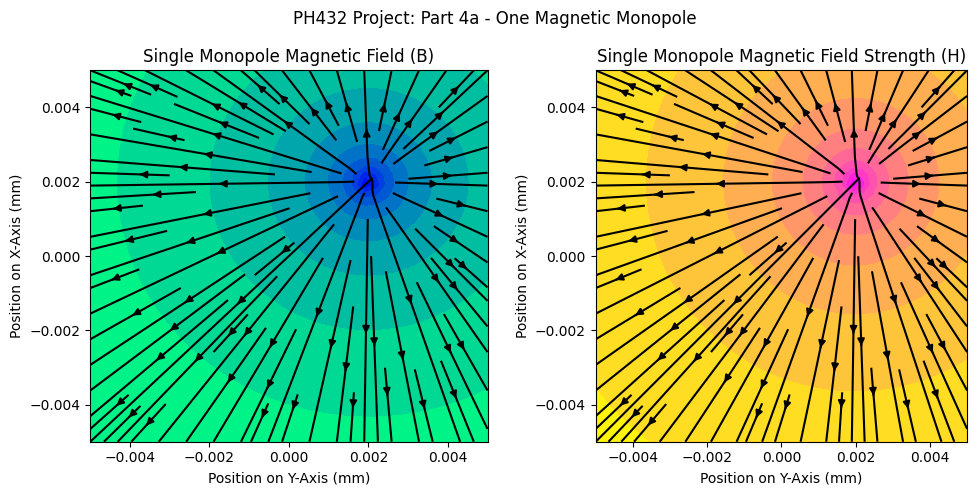

Option set for visualizing Two Magnetic Monopoles!


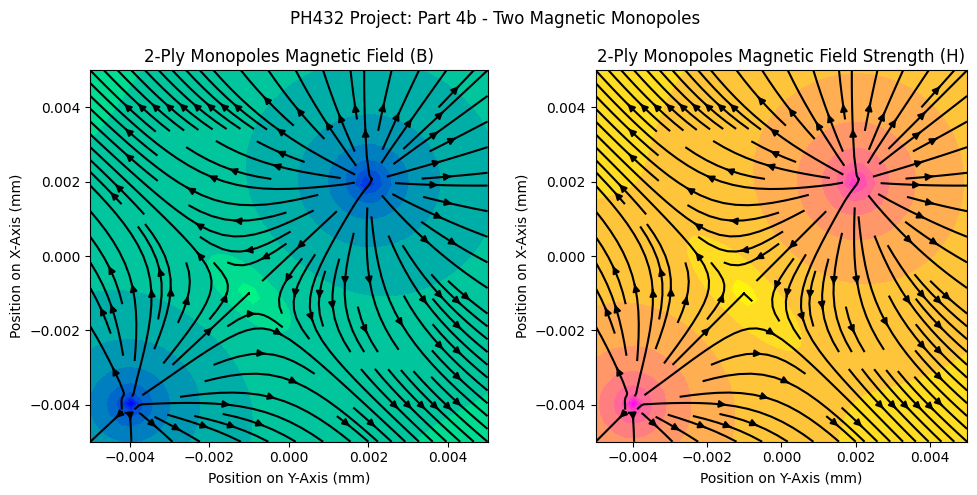

In [24]:
##### PH 432: Exploration of Electrodynamic Simulations, Part 2: Magnetism Project by Dan J.
#### Part 4 - Two-Dimensional (2D) & Three-Dimensional (3D) Visualization of Magnetic Monopoles & Multipoles
#### Credits to Magpylib Examples ( & https://magpylib.readthedocs.io/en/latest/_pages/gallery/gallery_shapes_pyvista.html#gallery-shapes-pyvista)

##### PH 432: Exploration of Electrodynamic Simulations, Part 2: Magnetism Project by Dan J.
#### Part 2 - Two-Dimensional (2D) Visualization of Magnetic Field (B) & Magnetic Field Strength (H)
#### Credits to Magpylib Examples (https://magpylib.readthedocs.io/en/latest/_pages/gallery/gallery_tutorial_field_computation.html#gallery-tutorial-field-computation & https://magpylib.readthedocs.io/en/latest/_pages/gallery/gallery_vis_mpl_streamplot.html#gallery-vis-mpl-streamplot)

## Ipywidgets-based input-widget setup!
widgetstyle = {'description_width': 'initial'}
# magnetization_x = wd.FloatSlider(min=-1.0, max=1.0, step=0.1, description='1st-Pole X-Mag. (mT)', style=widgetstyle)
# magnetization_y = wd.FloatSlider(min=-1.0, max=1.0, step=0.1, description='1st-Pole Y-Magn. (mT)', style=widgetstyle)
# magnetization_z = wd.FloatSlider(min=-1.0, max=1.0, step=0.1, description='1st-Pole Z-Mag. (mT)', style=widgetstyle)
qm_multiplier1 = wd.FloatSlider(value=1.0, min=-50.0, max=50.0, step=1.0, description='1st-Pole Qm Multiplier', style=widgetstyle)

# magnetization_x2 = wd.FloatSlider(min=-1.0, max=1.0, step=0.1, description='2nd-Pole X-Mag. (mT)', style=widgetstyle)
# magnetization_y2 = wd.FloatSlider(min=-1.0, max=1.0, step=0.1, description='2nd-Pole Y-Mag. (mT)', style=widgetstyle)
# magnetization_z2 = wd.FloatSlider(min=-1.0, max=1.0, step=0.1, description='2nd-Pole Z-Mag. (mT)', style=widgetstyle)
qm_multiplier2 = wd.FloatSlider(value=1.0, min=-50.0, max=50.0, step=1.0, description='2nd-Pole Qm Multiplier', style=widgetstyle)

## "MagpylibBadUserInput: Input parameter `CylinderSegment.dimension` 
## ...must be array_like of the form (r1, r2, h, phi1, phi2) with 0<=r1<r2, h>0, phi1<phi2 and phi2-phi1<=360,"
# dim_r1 = wd.FloatSlider(min=0.01, max=1.0, step=0.01, description='r1 (or x of Cube)')
# dim_r2 = wd.FloatSlider(min=0.01, max=1.0, step=0.01, description='r2 (or y of Cube)')
# dim_height = wd.FloatSlider(min=-1.0, max=1.0, step=0.01, description='height (m) of Cyl. (or z of Cube)')
# dim_phi1 = wd.FloatSlider(min=-360.0, max=360.0, step=1.0, description='φ1 (angle) of Cylindrical Slice')#wd.BoundedFloatText(min=-360.0, max=360.0, value=0, description='φ1 (angle) of Cylindrical Slice', step=1, style=widgetstyle)
# dim_phi2 = wd.FloatSlider(min=-360.0, max=360.0, step=1.0, description='φ2 (angle) of Cylindrical Slice')#wd.BoundedFloatText(min=-360.0, max=360.0, value=0, description='φ2 (angle) of Cylindrical Slice', step=1, style=widgetstyle)

# pole_x1 = wd.FloatSlider(value=0.002, min=-100.0, max=100.0, step=0.001, description='1st-Pole X-Position', style=widgetstyle)
# pole_y1 = wd.FloatSlider(value=0.002, min=-100.0, max=100.0, step=0.001, description='1st-Pole Y-Position', style=widgetstyle)
# pole_z1 = wd.FloatSlider(value=0.000, min=-100.0, max=100.0, step=0.001, description='1st-Pole Z-Position', style=widgetstyle)

# pole_x2 = wd.FloatSlider(value=-0.004, min=-100.0, max=100.0, step=0.001, description='2nd-Pole X-Position', style=widgetstyle)
# pole_y2 = wd.FloatSlider(value=-0.004, min=-100.0, max=100.0, step=0.001, description='2nd-Pole Y-Position', style=widgetstyle)
# pole_z2 = wd.FloatSlider(value=0.000, min=-100.0, max=100.0, step=0.001, description='2nd-Pole Z-Position', style=widgetstyle)

pole_x1 = wd.BoundedFloatText(value=0.002, min=-100.0, max=100.0, step=0.001, description='1st-Pole X-Position', style=widgetstyle)
pole_y1 = wd.BoundedFloatText(value=0.002, min=-100.0, max=100.0, step=0.001, description='1st-Pole Y-Position', style=widgetstyle)
pole_z1 = wd.BoundedFloatText(value=0.000, min=-100.0, max=100.0, step=0.001, description='1st-Pole Z-Position', style=widgetstyle)

pole_x2 = wd.BoundedFloatText(value=-0.004, min=-100.0, max=100.0, step=0.001, description='2nd-Pole X-Position', style=widgetstyle)
pole_y2 = wd.BoundedFloatText(value=-0.004, min=-100.0, max=100.0, step=0.001, description='2nd-Pole Y-Position', style=widgetstyle)
pole_z2 = wd.BoundedFloatText(value=0.000, min=-100.0, max=100.0, step=0.001, description='2nd-Pole Z-Position', style=widgetstyle)

gen_button = wd.Button(description='Generate monopole(s) magnetic field (B) & strength (H) graphz!')
reset_button = wd.Button(description='Reset')

options_setting = wd.Dropdown(#_setter = wd.Dropdown(
    #options=[('Cylindrical Slice', 1), ('Cube', 2), ('Both! [might be buggy heh)', 3)],
    options=['One Magnetic Monopole', 'Two Magnetic Monopoles'],
    value='One Magnetic Monopole',
    description='1 or 2 Monopoles?',
    disabled=False,
    style=widgetstyle,
)

options_setting_val = 1

# options_setting = wd.Dropdown(
#     options=[('Cylindrical Slice', 1), ('Cube', 2), ('Both! [might be buggy heh)', 3)],
#     value=1,
#     description='Choose the magnet shape(s):',
#     disabled=True,
#     style=widgetstyle,
# )

output = wd.Output()

#options_setting

# wd.VBox([
#     wd.HBox([gen_button, reset_button]),
#     output])

## Below code implementations defining the mono_field and the magnetic monopole is given by Magpylib's Magnetic Monopole example from CustomSource Example
## Credits to https://magpylib.readthedocs.io/en/latest/_pages/gallery/gallery_tutorial_custom.html#gallery-tutorial-custom
## Modified for more customizability
def monopole_field1(field, observers):
    global custom_Qm1
    custom_Qm1 = qm_multiplier1.value
    Qm = (custom_Qm1 * 1e-6)  # unit T·m²
    #print(str(custom_Qm1), str(Qm))
    obs = np.array(observers).T  # unit m
    B = Qm * (obs / np.linalg.norm(obs, axis=0) ** 3).T  # unit T
    if field == "B":
        return B  # unit T
    elif field == "H":
        H = B / mu_0#magpy.MU0  # unit A/m
        return H
    else:
        raise ValueError("[Monopole I Error #1]: Field Value must be either B or H")

def monopole_field2(field, observers):
    global custom_Qm2
    custom_Qm2 = qm_multiplier2.value
    Qm = (custom_Qm2 * 1e-6)  # unit T·m²
    #print(str(custom_Qm2), str(Qm))
    obs = np.array(observers).T  # unit m
    B = Qm * (obs / np.linalg.norm(obs, axis=0) ** 3).T  # unit T
    if field == "B":
        return B  # unit T
    elif field == "H":
        H = B / mu_0#magpy.MU0  # unit A/m
        return H
    else:
        raise ValueError("[Monopole II Error #1]: Field Value must be either B or H")

#monopole = mag.misc.CustomSource(field_func=monopole_field)

## Default widget-inputs!
# magnetization_x.value = 0.2
# magnetization_y.value = 0.0
# magnetization_z.value = 0.0

# dim_r1.value = 0.03
# dim_r2.value = 0.04
# dim_height.value = 0.07
# dim_phi1.value = 0
# dim_phi2.value = 360

pole_x1.value = 0.002
pole_y1.value = 0.002
pole_z1.value = 0.000

pole_x2.value = -0.004
pole_y2.value = -0.004
pole_z2.value = 0.000
pole_x2.disabled = True
pole_y2.disabled = True
pole_z2.disabled = True

qm_multiplier1.value = 1
qm_multiplier2.value = 1
qm_multiplier2.disabled = True

options_setting.value = 'One Magnetic Monopole'
custom_Qm1 = 1
custom_Qm2 = 1

## Widget helper functions!

def shake_etchasketch(_):
    
    # magnetization_x.value = 0.2
    # magnetization_y.value = 0.0
    # magnetization_z.value = 0.0

    # dim_r1.value = 0.03
    # dim_r2.value = 0.04
    # dim_height.value = 0.07
    # dim_phi1.value = 0
    # dim_phi2.value = 360
    pole_x1.value = 0.002
    pole_y1.value = 0.002
    pole_z1.value = 0.000

    pole_x2.value = -0.004
    pole_y2.value = -0.004
    pole_z2.value = 0.000
    pole_x2.disabled = True
    pole_y2.disabled = True
    pole_z2.disabled = True

    qm_multiplier1.value = 1
    qm_multiplier2.value = 1
    qm_multiplier2.disabled = True
    
    global options_setting_val, custom_Qm1, custom_Qm2#monopole1, monopole2, 
    options_setting_val = 1
    
    options_setting.value = 'One Magnetic Monopole'
    custom_Qm1 = 1
    custom_Qm2 = 1
    
    # monopole1 = mag.misc.CustomSource(field_func=monopole_field1)
    # monopole2 = mag.misc.CustomSource(field_func=monopole_field2)
    
    with output:
        refresh(1)
        
def generator_thingy(_):
    
    with output:
        
        refresh(0)

## Credits to https://stackoverflow.com/questions/34020789/ipywidgets-dropdown-widgets-what-is-the-onchange-event & https://github.com/ipython/traitlets
def setting_set(setting):
    #print(str(setting['name']))
    global options_setting_val
    if setting['type'] == 'change' and setting['name'] == 'value':
        print("Option set for visualizing %s!" % setting['new'])
        #options=['Cylindrical Slice', 'Cube', '(this might buggy heh) Both'],
        if setting['new'] == 'One Magnetic Monopole':
            options_setting_val = 1
            
            pole_x2.disabled = True
            pole_y2.disabled = True
            pole_z2.disabled = True
            qm_multiplier2.disabled = True
            
        elif setting['new'] == 'Two Magnetic Monopoles':
            options_setting_val = 2
            
            pole_x2.disabled = False
            pole_y2.disabled = False
            pole_z2.disabled = False
            qm_multiplier2.disabled = False
            
        else:
            print("[PH432] Somehow the options_setting_val is not 1 or 2, which is wack")

## Plot displayer function!
def refresh(reset):
    
    output.clear_output(wait=True)
    
    if reset == 1:
        output.clear_output(wait=True)
    
    else:
        
        # If one magnetic monopole!
        if options_setting_val == 1:#: or options_setting_val == 3:
            # if dim_height.value <= 0:
            #     print("Part 2b.I Error Detected! For the Cube magnet, height must be greater than 0!\nAutomatically setting height to 0.01!")
            #     dim_height.value = 0.01
            
            #custom_Qm = qm_multiplier.value
            monopole1 = mag.misc.CustomSource(field_func=monopole_field1, position=(pole_x1.value, pole_y1.value, pole_z1.value))
            # monopole2 = mag.misc.CustomSource(field_func=monopole_field2, position=(pole_x2.value, pole_y2.value, pole_z2.value))
            
            plot.close()
            figure1, [axe11, axe12] = plot.subplots(1, 2, figsize=(10,5))
            
            #xyz = np.linspace(-0.05, 0.05, 40)
            x1,y1 = np.mgrid[-0.005:0.005:40j, -0.005:0.005:40j].transpose((0, 2, 1))
            observation_deck1 = np.stack([x1,y1,np.zeros((40, 40))], axis=2)#np.array([[(x, 0, z) for x in xyz] for z in xyz])
            
            B = mag.getB(monopole1, observation_deck1, sumup=True)
            H = mag.getH(monopole1, observation_deck1, sumup=True)
            
            normalized_B = np.linalg.norm(B, axis=2)
            normalized_H = np.linalg.norm(H, axis=2)
            
            contourplot1 = axe11.contourf(x1, y1, np.log10(normalized_B), cmap="winter_r", levels=10)
            contourplot2 = axe12.contourf(x1, y1, np.log10(normalized_H), cmap="spring_r", levels=10)
            
            axe11.streamplot(
                x1, y1, B[:, :, 0], B[:, :, 1], color="k", density=1
            )

            axe12.streamplot(
                x1, y1, H[:, :, 0], H[:, :, 1], color="k", density=1
            )
            
            # Create the Cuboid (cube) magnet thingy
            ## Sanity Debug #1
            #print(magnetization_x.value, magnetization_y.value, magnetization_z.value, dim_r1.value, dim_r2.value, dim_height.value)
            
            #cube = mag.magnet.Cuboid(magnetization=(magnetization_x.value, magnetization_y.value, magnetization_z.value), dimension=(dim_r1.value, dim_r2.value, dim_height.value))
            
            # # Awesome analytical method-based magnetic field (B) & magnetic field strength (H) calculation Magpylib functions!
            # B = mag.getB(monopole1, observation_deck1, sumup=True)#monopole1.getB(observation_deck1)
            # normalized_B_color = np.log10(np.linalg.norm(B, axis=2))
            # H = mag.getH(monopole1, observation_deck1, sumup=True)#cube.getH(observation_deck1)
            
            # # Plot streamplot of magnetic field (B) of cube magnet!
            # axe11.streamplot(
            #     observation_deck1[:, :, 0] * 1000, observation_deck1[:, :, 2] * 1000, B[:, :, 0], B[:, :, 2], density=1, cmap='copper_r', color=normalized_B_color, linewidth=1,
            # )
            
            # # Plot streamplot of magnetic field strength (H) of cube magnet!
            # axe12.streamplot(
            #     observation_deck1[:, :, 0] * 1000, observation_deck1[:, :, 2] * 1000, H[:, :, 0], H[:, :, 2], density=1, cmap='copper_r', color=normalized_B_color, linewidth=1,
            # )
        
            # # Plot cube magnet shape boundary outline thingy
            # for axez in [axe11, axe12]:
            #     axez.plot(
            #         np.array([1, 1, -1, -1, 1]) * 10, np.array([1, -1, -1, 1, 1]) * 10, "k--", lw=2,
            #     )
            
            axe11.set(
                title="Single Monopole Magnetic Field (B)", xlabel="Position on Y-Axis (mm)", ylabel="Position on X-Axis (mm)",
            )
            
            axe12.set(
                title="Single Monopole Magnetic Field Strength (H)", xlabel="Position on Y-Axis (mm)", ylabel="Position on X-Axis (mm)", aspect=1,
            )
            
            figure1.suptitle("PH432 Project: Part 4a - One Magnetic Monopole", fontsize=12)
            plot.tight_layout()
            plot.savefig("ph432-project-part4a-onepole.png")
            #plot.show()
            
        # If two magnetic monopoles!
        if options_setting_val == 2:# or options_setting_val == 3:
            # if dim_height.value <= 0:
            #     print("Part 2b.I Error Detected! For the Cube magnet, height must be greater than 0!\nAutomatically setting height to 0.01!")
            #     dim_height.value = 0.01
            
            #custom_Qm = qm_multiplier.value
            monopole1 = mag.misc.CustomSource(field_func=monopole_field1, position=(pole_x1.value, pole_y1.value, pole_z1.value))
            monopole2 = mag.misc.CustomSource(field_func=monopole_field2, position=(pole_x2.value, pole_y2.value, pole_z2.value))
            
            plot.close()
            figure2, [axe21, axe22] = plot.subplots(1, 2, figsize=(10,5))
            
            # xyz = np.linspace(-0.05, 0.05, 40)
            # observation_deck2 = np.array([[(x, 0, z) for x in xyz] for z in xyz])
            x2,y2 = np.mgrid[-0.005:0.005:40j, -0.005:0.005:40j].transpose((0, 2, 1))
            observation_deck2 = np.stack([x2,y2,np.zeros((40, 40))], axis=2)
            
            B2 = mag.getB([monopole1, monopole2], observation_deck2, sumup=True)
            H2 = mag.getH([monopole1, monopole2], observation_deck2, sumup=True)
            
            normalized_B2 = np.linalg.norm(B2, axis=2)
            normalized_H2 = np.linalg.norm(H2, axis=2)
            
            contourplot1 = axe21.contourf(x2, y2, np.log10(normalized_B2), cmap="winter_r", levels=10)
            contourplot2 = axe22.contourf(x2, y2, np.log10(normalized_H2), cmap="spring_r", levels=10)
            
            axe21.streamplot(
                x2, y2, B2[:, :, 0], B2[:, :, 1], color="k", density=1
            )

            axe22.streamplot(
                x2, y2, H2[:, :, 0], H2[:, :, 1], color="k", density=1
            )
            
            # # Create the Cuboid (cube) magnet thingy
            # ## Sanity Debug #1
            # #print(magnetization_x.value, magnetization_y.value, magnetization_z.value, dim_r1.value, dim_r2.value, dim_height.value)
            
            # #cube = mag.magnet.Cuboid(magnetization=(magnetization_x.value, magnetization_y.value, magnetization_z.value), dimension=(dim_r1.value, dim_r2.value, dim_height.value))
            
            # # Awesome analytical method-based magnetic field (B) & magnetic field strength (H) calculation Magpylib functions!
            # B = cube.getB(observation_deck2)
            # normalized_B_color = np.log10(np.linalg.norm(B, axis=2))
            # H = cube.getH(observation_deck2)
            
            # # Plot streamplot of magnetic field (B) of cube magnet!
            # axe21.streamplot(
            #     observation_deck2[:, :, 0] * 1000, observation_deck2[:, :, 2] * 1000, B[:, :, 0], B[:, :, 2], density=1, cmap='copper_r', color=normalized_B_color, linewidth=1,
            # )
            
            # # Plot streamplot of magnetic field strength (H) of cube magnet!
            # axe22.streamplot(
            #     observation_deck2[:, :, 0] * 1000, observation_deck2[:, :, 2] * 1000, H[:, :, 0], H[:, :, 2], density=1, cmap='copper_r', color=normalized_B_color, linewidth=1,
            # )
        
            # # Plot cube magnet shape boundary outline thingy
            # for axez in [axe21, axe22]:
            #     axez.plot(
            #         np.array([1, 1, -1, -1, 1]) * 10, np.array([1, -1, -1, 1, 1]) * 10, "k--", lw=2,
            #     )
            
            axe21.set(
                title="2-Ply Monopoles Magnetic Field (B)", xlabel="Position on Y-Axis (mm)", ylabel="Position on X-Axis (mm)",
            )
            
            axe22.set(
                title="2-Ply Monopoles Magnetic Field Strength (H)", xlabel="Position on Y-Axis (mm)", ylabel="Position on X-Axis (mm)", aspect=1,
            )
            
            figure2.suptitle("PH432 Project: Part 4b - Two Magnetic Monopoles", fontsize=12)
            plot.tight_layout()
            plot.savefig("ph432-project-part4b-twopole.png")
            #plot.show()
        
    # Custom option-based output!
    #if reset == 0:#options_setting.value == 3 and reset == 0:
        # if options_setting_val == 3:
        #     with output:
        #         display(figure1, figure2, figure3)
        
        if options_setting_val == 1:
            with output:
                display(figure1)
        
        elif options_setting_val == 2:
            with output:
                display(figure2)
        
        else:
            print("[PH432 Project Debug #2]: Somehow the options_setting_val is not 1 or 2, which is wack")

# cylly_slice = mag.magnet.CylinderSegment(magnetization=(magnetization_x.value, magnetization_y.value, magnetization_z.value), dimension=(dim_r1.value, dim_r2.value, dim_height.value, dim_phi1.value, dim_phi2.value))

## Widget button mapping!
options_setting.observe(setting_set)
gen_button.on_click(generator_thingy)#refresh(reset=0))
reset_button.on_click(shake_etchasketch)#refresh(reset=1))


## Widgets layout!
# # magnetization_x = wd.FloatSlider(min=-1.0, max=1.0, step=0.1, description='1st-Pole X-Mag. (mT)', style=widgetstyle)
# # magnetization_y = wd.FloatSlider(min=-1.0, max=1.0, step=0.1, description='1st-Pole Y-Magn. (mT)', style=widgetstyle)
# # magnetization_z = wd.FloatSlider(min=-1.0, max=1.0, step=0.1, description='1st-Pole Z-Mag. (mT)', style=widgetstyle)
# # magnetization_x2 = wd.FloatSlider(min=-1.0, max=1.0, step=0.1, description='2nd-Pole X-Mag. (mT)', style=widgetstyle)
# # magnetization_y2 = wd.FloatSlider(min=-1.0, max=1.0, step=0.1, description='2nd-Pole Y-Mag. (mT)', style=widgetstyle)
# # magnetization_z2 = wd.FloatSlider(min=-1.0, max=1.0, step=0.1, description='2nd-Pole Z-Mag. (mT)', style=widgetstyle)
# qm_multiplier1 = wd.FloatSlider(value=1.0, min=-100.0, max=100.0, step=1.0, description='1st-Pole Qm Multiplier', style=widgetstyle)
# qm_multiplier2 = wd.FloatSlider(value=1.0, min=-100.0, max=100.0, step=1.0, description='2nd-Pole Qm Multiplier', style=widgetstyle)
# pole_x1 = wd.FloatSlider(value=0.002, min=-100.0, max=100.0, step=0.001, description='1st-Pole X-Position', style=widgetstyle)
# pole_y1 = wd.FloatSlider(value=0.002, min=-100.0, max=100.0, step=0.001, description='1st-Pole Y-Position', style=widgetstyle)
# pole_z1 = wd.FloatSlider(value=0.000, min=-100.0, max=100.0, step=0.001, description='1st-Pole Z-Position', style=widgetstyle)
# pole_x2 = wd.FloatSlider(value=-0.004, min=-100.0, max=100.0, step=0.001, description='2nd-Pole X-Position', style=widgetstyle)
# pole_y2 = wd.FloatSlider(value=-0.004, min=-100.0, max=100.0, step=0.001, description='2nd-Pole Y-Position', style=widgetstyle)
# pole_z2 = wd.FloatSlider(value=0.000, min=-100.0, max=100.0, step=0.001, description='2nd-Pole Z-Position', style=widgetstyle)
# gen_button = wd.Button(description='Generate monopole(s) magnetic field (B) & strength (H) graphz!')
# reset_button = wd.Button(description='Reset')
# options_setting = wd.Dropdown(#_setter = wd.Dropdown(
#     #options=[('Cylindrical Slice', 1), ('Cube', 2), ('Both! [might be buggy heh)', 3)],
#     options=['One Magnetic Monopole', 'Two Magnetic Monopoles'],
#     value='One Magnetic Monopole',
#     description='Choose how many magnetic monopoles to visualize:',
#     disabled=False,
#     style=widgetstyle,
# )


wd.VBox([
    # wd.HBox([magnetization_x, magnetization_y, magnetization_z]),
    # wd.HBox([dim_r1, dim_r2]),
    # wd.HBox([dim_height]),
    # wd.HBox([dim_phi1, dim_phi2]),
    wd.HBox([qm_multiplier1]),
    wd.HBox([pole_x1, pole_y1, pole_z1]),
    wd.HBox([qm_multiplier2]),
    wd.HBox([pole_x2, pole_y2, pole_z2]),
    wd.HBox([options_setting]),
    wd.HBox([gen_button]),
    wd.HBox([reset_button]),
    output
    ])



## References & Credits



[[1](https://www.cambridge.org/highereducation/books/introduction-to-electrodynamics/3AB220820DBB628E5A43D52C4B011ED4#overview)] D. J. Griffiths, Introduction to electrodynamics, 4 ed. Cambridge: Cambridge university press, 2017.

[[2](https://jupyter.org)] “Project Jupyter.” [Online]. Available: https://jupyter.org

[[3](https://github.com/magpylib/magpylib)] “magpylib/magpylib.” magpylib, Mar. 03, 2024. [Online]. Available: https://github.com/magpylib/magpylib

[[4](https://github.com/pyvista/pyvista)] C. Sullivan and A. Kaszynski, “PyVista: 3D plotting and mesh analysis through a streamlined interface for the Visualization Toolkit (VTK),” JOSS, vol. 4, no. 37, p. 1450, May 2019, doi: 10.21105/joss.01450. Available: https://github.com/pyvista/pyvista

[[5](https://pypi.org/project/ipywidgets/)] J. D. Team, “ipywidgets: Jupyter interactive widgets.” [Online]. Available: https://pypi.org/project/ipywidgets/

[[6](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.streamplot.html)] “matplotlib.pyplot.streamplot — Matplotlib 3.8.3 documentation.” [Online]. Available: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.streamplot.html

Credits to Magpylib's team for their awesome [*Examples and Tutorials* page](https://magpylib.readthedocs.io/en/latest/_pages/gallery/gallery_index.html), which were used as significant templates for the part-sections.

# **PH 431: *Exploration of Electrodynamic Simulations Project, Part 1: Electricity*** by Dan Jang

November 25th, 2023

## ***Part 1: Electricity*** **Project Specific** **Abstract**
Based on concepts explored in *PH 431: Electricity & Magnetism I* and from our textbook, *Introduction to Electrodynamics* by David J. Griffiths [[1]](https://www.cambridge.org/highereducation/books/introduction-to-electrodynamics/3AB220820DBB628E5A43D52C4B011ED4#overview), we created a computational physics project based on *Python* for exploring the simulation of various electrodynamics phenomena, particularly in the modeling and visualization of *electric fields*, *potentials*, and *point charges*.

Our exploration project was primarily based on a deconstructed, piece-by-piece implementation of these electrodynamics' topics in electromagnetism, where a *Python*-based, *Project Jupyter Notebook* [[2]](https://jupyter.org) was used to highlight particular parts & pieces of our project, with specific examples of electromagnetic phenomena and situations.

Our project primarily features the *PyCharge* [[3]](http://arxiv.org/abs/2107.12437) and *PyGame* [[4]](https://www.pygame.org/wiki/about) libraries – as well as the implementation of other libraries and visual or mathematical methods of computational physics.

The goal of our project was to help provide an elementary, or otherwise easy-to-under introduction to electromagnetism, particularly on the 3D representation of electric fields & potentials and moving point charges in those fields and potentials.

In [ ]:
##### PH 431: Exploration of Electrodynamic Simulations Project, Part 1: Electricity by Dan J.
#### Part 5 - Full GUI-Encapsulated Project Program

### Initialization (incase this is ran standalone outside of Jupyter Notebook)
import pygame as pgame
import numpy as np
#import math
import pycharge as pyc
import sys
import os
import matplotlib as mplotlib
import matplotlib.pyplot as plot
import threading
import tkinter as tk
from tkinterweb import HtmlFrame
from tkinter import ttk
from matplotlib import animation
from matplotlib.animation import FuncAnimation
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from matplotlib.figure import Figure
from ipywidgets import widgets as wd
from ipywidgets import interactive
from IPython.display import display, HTML
import imageio
from PIL import Image, ImageTk
import requests
from io import BytesIO

### Main tkinter-based GUI encapulation-wrapper program
class CoolGUI(tk.Tk):
    
    def __init__(self):
        
        super().__init__()
        self.option_add('*font', ('comic sans ms', 12, 'bold'))
        self.title("PH 431 Project - Exploration of Electrodynamic Simulations: Electric Fields, Potentials, & Point Charges by Dan J.")
        
        # Initialize tabs for our three simulation sections,
        # ...Part 2: Electric Field Simulation, Part 3: Electric Potential @ Midpoint, Part 4: Oscillating Point Charge.
        simulation_tabs = ttk.Notebook(self)
        self.initialize_part1(simulation_tabs)
        self.create_part2_tab(simulation_tabs)
        self.create_part3_tab(simulation_tabs)
        self.create_part4_tab(simulation_tabs)
        # Bonus: Fun MIDI music-player
        #self.plug_in_ipod(simulation_tabs)
        
        # Pack all three simulation-section tabs into our main GUI window!
        simulation_tabs.pack(expand=1, fill="both")
    
    def initialize_part1(self, simulation_tabs):
        part1_tab = ttk.Frame(simulation_tabs)
        simulation_tabs.add(part1_tab, text="Main Page!")
        
        part1 = Part1(part1_tab)
        part1_ipod = iPod(part1_tab)
        
        part1.pack(side="top", fill="both", expand=True)
        part1_ipod.pack(side="bottom", fill="both", expand=True)
    
    # Initializing the tab for Part 2: Electric Field Simulation
    def create_part2_tab(self, simulation_tabs):
        
        part2_tab = ttk.Frame(simulation_tabs)
        simulation_tabs.add(part2_tab, text="Part 2: Electric Field Simulation Minigame")
        
        part2 = Part2(part2_tab)
        part2.pack(side="top", fill="both", expand=True)
    
    # Initializing the tab for Part 3: Electric Potential @ Midpoint
    def create_part3_tab(self, simulation_tabs):
        
        part3_tab = ttk.Frame(simulation_tabs)
        simulation_tabs.add(part3_tab, text="Part 3: Electric Potential @ Midpoint Calculation & Graphical Visualization")
        
        part3 = Part3(part3_tab)
        part3.pack(side="top", fill="both", expand=True)
    
    # Initializing the tab for Part 4: Oscillating Point Charge
    def create_part4_tab(self, simulation_tabs):
        
        part4_tab = ttk.Frame(simulation_tabs)
        simulation_tabs.add(part4_tab, text="Part 4: Oscillating Point Charge Simulation")
        
        part4 = Part4(part4_tab)
        part4.pack(side="top", fill="both", expand=True)
    
    # # Initializing the bonus iPod music player (MIDI player using PyGame)
    # def plug_in_ipod(self, simulation_tabs):
        
    #     ipod_tab = ttk.Frame(simulation_tabs)
    #     simulation_tabs.add(ipod_tab, text="iPod - 🎵 Now Playing: Africa by Toto... 🎷")
        
    #     ipodplayer = iPod(ipod_tab)
    #     ipodplayer.pack(side="top", fill="both", expand=True)

### Extra: Fun MIDI music-player
class iPod(tk.Frame):
    
    def __init__(self, root):
        
        super().__init__(root)
        
        self.turn_on_ipod()
        
        #self.play_button_tab = ttk.Frame(self.notebook)
        #self.stop_button_tab = ttk.Frame(self.notebook)
        
        self.play_button = tk.Button(self, text="▶️", command=self.tunes)
        self.stop_button = tk.Button(self, text="⏹", command=self.stop_tunes)
        self.play_button.grid(row=5, column=0)
        self.stop_button.grid(row=5, column=1)
    
        self.tunes()
    
    def turn_on_ipod(self):
        
        clock = pgame.time.Clock()
        pgame.mixer.init(44100, -16, 2, 1024)
        pgame.mixer.music.set_volume(0.8)
        
        #pgame.mixer.init()
        
        #curr = os.path.dirname(os.path.abspath(__file__))
        #curr = os.getcwd()
        
        # Credits to BitMidi for the MIDI file, https://bitmidi.com/toto-africa-mid
        self.musicfile = "toto-africa.mid"#os.path.join("toto-africa.mid")#curr, "toto-africa.mid") #"toto-africa.mid" 
        #self.
        #self.channel = pgame.mixer.Channel(0)
        self.itunes = pgame.mixer.music#.load(self.musicfile)#pgame.mixer.music.load(self.musicfile)
        self.itunes.load(self.musicfile)
    
    def tunes(self):
        
        #self.channel.play(self.itunes)
        if not self.itunes.get_busy():
            self.itunes.load(self.musicfile)
            self.itunes.rewind()
            #pgame.mixer.music.play()
            #self.channel.play(self.itunes, loops=-1)
            self.itunes.play()
    
    def stop_tunes(self):
        
        #pgame.mixer.music.stop()
        self.itunes.stop()
        self.itunes.unload()
        #pgame.quit()

### GUI Program main page & help guide
class Part1(tk.Frame):
    
    #### PH 431: Exploration of Electrodynamic Simulations Project by Dan J.
    ### Initialization of Project Libraries, Constants, & Jupyter Notebook
    def __init__(self, root):
        
        super().__init__(root)
        self.maintext = "Welcome to PH 431 Project: Exploration of Electrodynamic Simulations by Dan J.! \n\n" + \
                        "This project features three electrodynamic simulations:\n\n" + \
                        "Part 2: Electric Field Simulation (Left-click adds a positive charge & Right-click adds a negative charge)\n" + \
                        "Part 3: Calculating & Heatmap Visualization of the Electric Potential @ Midpoint (Between Two Point Charges)\n" + \
                        "Part 4: Oscillating Point Charge Animation\n\n" + \
                        "Thank you for checking out my project. I hope you may find it interesting!"
        self.mainpage = tk.Label(self, text=self.maintext, font=("Times New Roman", 15))
        self.mainpage.grid(row=0, column=0, pady=50, sticky="WENS")
        
        # Mild get-request exploration for downloading the cool electroscope photo
        cool_electroscope_photo = "https://ia802704.us.archive.org/19/items/sci-inst_21677147/21677147.jpg" # Credits to Middlebury College Library (https://archive.org/details/sci-inst_21677147)
        photo_download = requests.get(cool_electroscope_photo)
        photo_data = BytesIO(photo_download.content)
        
        processed_photo_data = Image.open(photo_data)
        shrunk_photo_size = (500, 500)
        processed_photo_data = processed_photo_data.resize(shrunk_photo_size, Image.ANTIALIAS)

        self.electroscope_photo = ImageTk.PhotoImage(processed_photo_data)
        self.electroscope_photo_label = tk.Label(self, image=self.electroscope_photo, text="a cool electroscope photo by Middlebury College Library")
        
        self.electroscope_photo_label.grid(row=1, column=0, pady=10, sticky="WENS")

### Encapsulation of Part 2: Electric Field Simulation as a Class
### Heavily modified to migrate from PyGame implementation to a tkinter-compatible version
class Part2(tk.Frame):
    
    ##### PH 431: Exploration of Electrodynamic Simulations Project by Dan J.
    #### Part 2 - Electric Field Simulation Demonstration
    def __init__(self, root):
        
        super().__init__(root)
        
        ## Initialize PyGame
        #pgame.init()

        ## Dimensional & Physical Constants
        self.w, self.h = 1000, 1000
        self.q_radius = 10
        self.K = 8.99e9 #N * m^2 / C^2 (Coulomb's Constant)

        ## Color Constants
        self.black_color = "black"#(47, 47, 56)
        self.white_color = "white"#(255, 255, 255)
        self.red_color = "red"#(255, 62, 62)
        self.blue_color = "blue"#(62, 62, 255)
        
        ## Initialize a tkinter Canvas for electric field point charges to be drawn
        self.canvas = tk.Canvas(self, width=self.w, height=self.h, bg=self.white_color)
        self.canvas.pack()
        
        ## User-mouse clicks using tkinter.canvas
        self.canvas.bind("<Button-1>", self.add_positive_pointcharge)
        self.canvas.bind("<Button-3>", self.add_negative_pointcharge)
        
        ## Tkinter-compatible list of point charges
        self.pointcharges = []
        
        ## Draw initial / update tkinter-field
        self.update_field()
    
    def add_positive_pointcharge(self, event):
        
        self.pointcharges.append(self.PointCharge((event.x, event.y), 1e-9))
        self.update_field()
    
    def add_negative_pointcharge(self, event):
        
        self.pointcharges.append(self.PointCharge((event.x, event.y), -1e-9))
        self.update_field()
    
    def e_field(self, pcharge, point):
        
        q = pcharge.charge
        r_vector = np.array(point) - np.array(pcharge.position)
        r_magnitude = np.linalg.norm(r_vector)
        
        if r_magnitude == 0:
            return np.array([0, 0])
        
        r_carot = (r_vector / r_magnitude)
        e_vector = (self.K * q / r_magnitude ** 2) * r_carot
        
        return e_vector
    
    def update_field(self):
        
        # Clear canvas
        self.canvas.delete("all")
        
        # Draw le point charges
        for p in self.pointcharges:
            color = self.blue_color if p.charge > 0 else self.red_color
            self.canvas.create_oval(p.position[0] - self.q_radius, p.position[1] - self.q_radius,
                                    p.position[0] + self.q_radius, p.position[1] + self.q_radius,
                                    fill=color, outline=color)
            
        # Draw electric field line-vectors
        for y in range(0, self.h, 20):
            for x in range(0, self.w, 20):
                total_e = np.array([0.0, 0.0])
                
                for c in self.pointcharges:
                    total_e += self.e_field(c, (x, y))
                
                e_magnitude = np.linalg.norm(total_e)
                
                if e_magnitude > 0:
                    e_direction = total_e / e_magnitude
                    e_position = (x + int(e_direction[0] * 10), y + int(e_direction[1] * 10))
                    self.canvas.create_line(x, y, *e_position, fill=self.black_color)
                    
    ## Defining point charges as a class
    ## From Part 2: Electric Field Simulation
    class PointCharge:
        
            def __init__(self, position, charge):
                
                self.position = position
                self.charge = charge
                
                # def point(self, screen):
                    
                #     color = red_color if self.charge > 0 else blue_color
                #     pgame.draw.circle(screen, color, self.position, q_radius)
                    
    # ## Electric field function for calculating the electric field line vectors at a given point charge due to its charge
    # def e_field(point_charge, point):
        
    #     q = point_charge.charge
    #     r_vector = np.array(point) - np.array(point_charge.position)
    #     r_magnitude = np.linalg.norm(r_vector)
        
    #     if r_magnitude == 0:
    #         return np.array([0, 0])
        
    #     r_carot = (r_vector / r_magnitude)
    #     e_vector = (K * q / r_magnitude ** 2) * r_carot
        
    #     return e_vector

    # ## Initialize the PyGame Demo Window for Part 2: Electric Field Simulation
    # efield_demo = pgame.display.set_mode((w, h))
    # pgame.display.set_caption("PH 431 Project: Part 2 - Electric Field Simulation")

    # ## Main Function for Part 2: Electric Field Simulation
    # pointcharges = []
    # state = True

    # while state:
    #     efield_demo.fill(white_color)
        
    #     # Main simulation loop for event-handling
    #     for event in pgame.event.get():
    #         if event.type == pgame.QUIT:
    #             state = False
                
    #         # If the user presses either the left or right mouse buttonz
    #         elif event.type == pgame.MOUSEBUTTONDOWN:
    #             position = pgame.mouse.get_pos()
                
    #             # Left-click, add positive point charge
    #             if event.button == 1:
    #                 pointcharges.append(PointCharge(position, 1e-9))
                    
    #             # Right-click, add negative point charge
    #             elif event.button == 3:
    #                 pointcharges.append(PointCharge(position, -1e-9))
                
    #     # Loop for drawing the point charges
    #     for p in pointcharges:
    #         p.point(efield_demo)
            
    #     # Calculating & drawing out the electric field line-vectors
    #     for y in range(0, h, 20):
    #         for x in range(0, w, 20):
    #             total_e = np.array([0.0, 0.0])
                
    #             for c in pointcharges:
    #                 total_e += e_field(c, (x, y))
                
    #             e_magnitude = np.linalg.norm(total_e)
    #             if e_magnitude > 0:
    #                 e_direction = total_e / e_magnitude
    #                 e_position = (x + int(e_direction[0] * 10), y + int(e_direction[1] * 10))
    #                 pgame.draw.line(efield_demo, black_color, (x, y), e_position)
        
        # After drawing the electric field line-vectors, update the display
        #pgame.display.flip()

    # End simulation
    #pgame.quit()

### Encapsulation of Part 3: Electric Potential as a Class
### Heavily modified to migrate from IPython & ipywidget implementation to a tkinter-compatible version
class Part3(tk.Frame):
    
    def __init__(self, root):
        
        super().__init__(root)
        ##### PH 431: Exploration of Electrodynamic Simulations Project by Dan J.
        #### Part 3 - Electric Potentials

        ## Physical Constants & Arrays
        self.K = 8.99e9 #N * m^2 / C^2 (Coulomb's Constant)
        self.pointcharges = []
        self.positions = []

        ## Widgets modified to tkinter-compatible implementation of panels for user-input of point charges' positions & charge-values
        self.charge_val = tk.Label(self, text='Charge Value (C):')#wd.BoundedFloatText(value=1e-9, description='Charge Value (C):', step=1e-9)
        self.charge_val_input = tk.Entry(self)
        self.charge_val_input.insert(0, '1e-9')
        
        self.charge_xpos = tk.Label(self, text='X-position:')#wd.FloatSlider(min=0.1, max=10, step=0.1, description='X-position')
        self.charge_xpos_input = tk.Entry(self)
        self.charge_xpos_input.insert(0, '0.1')
        
        self.charge_ypos = tk.Label(self, text='Y-position:')#wd.FloatSlider(min=0.1, max=10, step=0.1, description='Y-position')
        self.charge_ypos_input = tk.Entry(self)
        self.charge_ypos_input.insert(0, '0.1')
        
        self.new_pointcharge_button = tk.Button(self, text='Add le Point Charge', command=self.new_pcharge)#wd.Button(description='Add le Point Charge')
        self.reset_pointcharges_button = tk.Button(self, text='Reset', command=self.reset_pcharges)#wd.Button(description='Reset')

        #self.output = wd.Output()
        
        ## Display-outline of the modified tkinter-compatible widget implementations
        self.charge_val.grid(row=0, column=0)
        self.charge_val_input.grid(row=0, column=1)
        
        self.charge_xpos.grid(row=1, column=0)
        self.charge_xpos_input.grid(row=1, column=1)
        
        self.charge_ypos.grid(row=2, column=0)
        self.charge_ypos_input.grid(row=2, column=1)
        
        self.new_pointcharge_button.grid(row=3, column=0)
        self.reset_pointcharges_button.grid(row=3, column=1)

        # ## Display le output
        # self.figure, self.ax = plot.subplots(figsize=(5, 5))
        # self.canvas = FigureCanvasTkAgg(self.figure, master=self)
        # self.canvas.get_tk_widget().grid(row=4, column=0, columnspan=2)
        self.figure = None
        self.ax = None
        self.canvas = None
        
        ## Initial refresh of canvas/plot
        self.refresh()

    ### Helper Functions for Widgets
    ## Function for a new point charge
    def new_pcharge(self):
        
        try:
        #with output:
            pcharge = float(self.charge_val_input.get())
            xpos = float(self.charge_xpos_input.get())
            ypos = float(self.charge_ypos_input.get())
            position = (xpos, ypos)
            if len(self.pointcharges) < 2:
                #pcharge = charge_val.value
                #position = (charge_xpos.value, charge_ypos.value)
                self.pointcharges.append(pcharge)
                self.positions.append(position)
                self.refresh()
                
            else:
                print("Whoopsie, looks like there are already two point charges placed - please click reset to add new point charges!")
        
        except ValueError:
            print("Whoopsie, please make sure that you enter valid, numerical float values for the x- & y-positions [not at 0] as well as for the charge value!")

    ## Function for resetting the point charges
    def reset_pcharges(self):
        
        self.pointcharges = []
        self.positions = []
        self.refresh()
        
        #global pointcharges, positions
        
        # with output:
        #     pointcharges = []
        #     positions = []
            
        #     refresh()

    ## Refreshing function for the displayed plot
    def refresh(self):
        #self.canvas.get_tk_widget().grid_c
        #self.ax.clear()#output.clear_output(wait=True)
        #self.figure.clear()
        ## Display le output
        self.figure, self.ax = plot.subplots(figsize=(5, 5))
        #self.canvas.get_tk_widget().grid(row=4, column=0, columnspan=2)
        #self.figure, self.ax = plot.subplots(figsize=(5, 5))
        
        x = np.linspace(0, 10, 100)
        y = np.linspace(0, 10, 100)
        X, Y = np.meshgrid(x, y)
        V = np.zeros_like(X)
        
        for pc, p in zip(self.pointcharges, self.positions):
            r = np.sqrt((X - p[0]) ** 2 + (Y - p[1]) ** 2)
            V += self.K * pc / r
        
        vmin = np.min(V)
        vmax = np.max(V)
        
        fieldmap = self.ax.contourf(X, Y, V, levels=50, cmap='RdBu_r', vmin=vmin, vmax=vmax)
        self.figure.colorbar(fieldmap, ax=self.ax, label='Electric Potential (V)')
        
        for pc, p in zip(self.pointcharges, self.positions):
            
            self.ax.plot(p[0], p[1], 'bo' if pc > 0 else 'ro')
            #pcharge_txt = f'{pc:.2e} V'
            if pc > 0:
                self.ax.text(p[0], p[1], f'{pc:.2e} Coulombs [+q]', color='black', fontsize=8)
            else:
                self.ax.text(p[0], p[1], f'{pc:.2e} Coulombs [-q]', color='black', fontsize=8)
        
        if len(self.pointcharges) == 2:
            
            self.ax.plot([self.positions[0][0], self.positions[1][0]], [self.positions[0][1], self.positions[1][1]], linestyle='dashed', lw=2)
            midpoint_Q = ((self.positions[0][0] + self.positions[1][0]) / 2, (self.positions[0][1] + self.positions[1][1]) / 2)
            midpoint_Q_potential = sum(self.K * pc / np.sqrt((midpoint_Q[0] - p[0]) ** 2 + (midpoint_Q[1] - p[1]) ** 2) 
                                    for pc, p in zip(self.pointcharges, self.positions))
            self.ax.text(midpoint_Q[0], midpoint_Q[1], f'Electric Potential @ Midpoint: {midpoint_Q_potential:.2e} V', color='black', ha='center', va='bottom', fontsize=9)
            self.figure.suptitle('PH431 Project: Part 3 - Electric Potential @ Midpoint', fontsize=12)
            #plot.savefig("ph431-project-part3-electric-field-at-midpoint.png")
        
        self.figure.suptitle('PH431 Project: Part 3 - Electric Potential @ Midpoint', fontsize=12)
        
        if self.canvas: self.canvas.get_tk_widget().grid_forget() # Reset
        
        self.canvas = FigureCanvasTkAgg(self.figure, master=self)
        self.canvas.draw()
        self.canvas.get_tk_widget().grid(row=4, column=0, columnspan=2)
        #self.canvas.get_tk_widget().pack()
        # with output:
        #     display(figure)

    # ## Widget button mapping
    # new_pointcharge_button.on_click(new_pcharge)
    # reset_pointcharges_button.on_click(reset_pcharges)

    # ## Display le widgetz
    # wd.VBox([wd.HBox([charge_val, charge_xpos, charge_ypos]),
    #         wd.HBox([new_pointcharge_button, reset_pointcharges_button]),
    #         output])
    
### Encapsulation of Part 4: Point Charges as a Class
### Modified to adjust current matplotlib implementation to a bit more specifically tkinter-friendly version
class Part4(tk.Frame):
    
    def __init__(self, root):
        
        super().__init__(root)
        ##### PH 431: Exploration of Electrodynamic Simulations Project by Dan J.
        #### Part 4 - Point Charges
        ## Credits to PyCharge, for the examples/oscillating_animation.py (below is modified implementation of the example)

        ## Constants
        self.limit = 50e-9
        self.gridsize = 1000
        self.qlimit = 46e-9
        self.qgridsize = 17
        self.n_frames = 36
        self.fps = 12
        self.x, self.y, self.z = np.meshgrid(np.linspace(-self.limit, self.limit, self.gridsize), 0,
                                np.linspace(-self.limit, self.limit, self.gridsize), indexing='ij')
        self.qx, self.qy, self.qz = np.meshgrid(
                np.linspace(-self.qlimit, self.qlimit, self.qgridsize), 0,
                np.linspace(-self.qlimit, self.qlimit, self.qgridsize), indexing='ij'
            )
        
        ## Tkinter-widget implementation of widgets
        # ## Widget Buttons for Part 4: Point Charges
        # input_amplitude = wd.BoundedFloatText(value=2e-9, min=1e-9, max=5e-9, step=1e-10, description='Charge Amplitude (m):')
        # input_omega = wd.BoundedFloatText(value=7.49e+16, min=1e+16, max=1e+17, step=1e+15, description='Angular Frequency (rad/s):')
        # input_charge = wd.BoundedFloatText(value=1e-19, min=1e-20, max=1e-18, step=1e-20, description='Charge Magnitude (C):')
        # create_animation_button = wd.Button(description="Ready to oscillate?")
        # output = wd.Output()
        
        self.input_amplitude = tk.Label(self, text='Charge Amplitude (m):')
        self.input_amplitude_input = tk.Entry(self)
        self.input_amplitude_input.insert(0, '2e-9')
        
        self.input_omega = tk.Label(self, text='Angular Frequency (rad/s):')
        self.input_omega_input = tk.Entry(self)
        self.input_omega_input.insert(0, '7.49e+16')
        
        self.input_charge = tk.Label(self, text='Charge Magnitude (C):')
        self.input_charge_input = tk.Entry(self)
        self.input_charge_input.insert(0, '1e-19')
        
        self.create_animation_button = tk.Button(self, text='Ready to oscillate?', command=self.button_has_been_clicked)#button_has_been_clicked)
        self.status_txt = tk.Label(self, text='Oscillator standing by...')

        ## Display tkinter-widgetz
        self.input_amplitude.grid(row=0, column=0)
        self.input_amplitude_input.grid(row=0, column=1)
        self.input_omega.grid(row=1, column=0)
        self.input_omega_input.grid(row=1, column=1)
        self.input_charge.grid(row=2, column=0)
        self.input_charge_input.grid(row=2, column=1)
        self.create_animation_button.grid(row=3, column=0, columnspan=2)
        self.status_txt.grid(row=5, column=0, columnspan=2)
        self.le_animation = None
        self.anim = None
        self.canvas = None
        self.pc = None
        self.sim = None
        self.figure, self.ax = None, None
        self.im_plot = None
        self.position = None
        self.total_e = None
        self.Q = None
        self.u, self.v, self.r, self.dt, self.t = None, None, None, None, None
        
        # Sanity fix for animation not playing, just use HTML
        self.htmlwindow = HtmlFrame(self, messages_enabled=False)
        self.htmlwindow.grid(row=4, column=0, columnspan=2)
        self.htmlform = None
        
    def new_animation(self, amplitude, omega, charge_magnitude):
        
        self.x, self.y, self.z = np.meshgrid(np.linspace(-self.limit, self.limit, self.gridsize), 0,
                            np.linspace(-self.limit, self.limit, self.gridsize), indexing='ij')
        
        self.pc = pyc.OscillatingCharge(origin=(0, 0, 0), direction=(1, 0, 0),
                                amplitude=amplitude, omega=omega, q=charge_magnitude)
        self.sim = pyc.Simulation(self.pc)
        
        self.figure, self.ax = plot.subplots(figsize=(5, 5))
        #ax.set_position([0, 0, 1, 1])
        self.ax.set_xlim(-self.limit, self.limit)
        self.ax.set_ylim(-self.limit, self.limit)
        self.ax.set_title('PH431 Project: Part 4 - Oscillating Point Charge')
        if charge_magnitude > 0:
            self.im_plot = self.ax.imshow(np.zeros((self.gridsize, self.gridsize)), origin='lower',
                                extent=(-self.limit, self.limit, -self.limit, self.limit), vmax=7, cmap='seismic_r')
        else:
            self.im_plot = self.ax.imshow(np.zeros((self.gridsize, self.gridsize)), origin='lower',
                                extent=(-self.limit, self.limit, -self.limit, self.limit), vmax=7, cmap='RdBu_r')
        self.ax.set_xticks([])
        self.ax.set_yticks([])
        self.im_plot.set_norm(mplotlib.colors.LogNorm(vmin=1e5, vmax=1e8))
        
        self.qx, self.qy, self.qz = np.meshgrid(
            np.linspace(-self.qlimit, self.qlimit, self.qgridsize), 0,
            np.linspace(-self.qlimit, self.qlimit, self.qgridsize), indexing='ij'
        )
        self.Q = self.ax.quiver(self.qx, self.qz, self.qx[:, 0, :], self.qz[:, 0, :],
                    scale_units='xy')
        if charge_magnitude > 0:
            self.position = self.ax.scatter(self.pc.xpos(0), 0, s=5, marker='o', c='blue')
        else:
            self.position = self.ax.scatter(self.pc.xpos(0), 0, s=5, marker='o', c='red')
        
        def _refresh_animation(frame):
            # if self.status_txt:# self.status.get_tk_widget()
            #     self.status_txt.get_tk_widget().destroy()
            
            debugtxt = f"Processing animation @ frame # {frame + 1}/{self.n_frames}..."
            self.status_txt.config(text=debugtxt)
            self.update_idletasks()
            #self.status_txt.grid(row=5, column=0, columnspan=2)
            #sys.stdout.write(debugtxt)
            #sys.stdout.flush()
            #dt = 2 * np.pi / self.pc.omega / self.n_frames
            self.t = frame * self.dt
            self.total_e = self.sim.calculate_E(t=self.t, x=self.x, y=self.y, z=self.z, pcharge_field='Total')
            
            self.u = self.total_e[0][:, 0, :]
            self.v = self.total_e[2][:, 0, :]
            self.im_plot.set_data(np.sqrt(self.u ** 2 + self.v ** 2).T)
            
            self.total_e = self.sim.calculate_E(
                t=self.t, x=self.qx, y=self.qy, z=self.qz, pcharge_field='Total'
            )
            self.u = self.total_e[0][:, 0, :]
            self.v = self.total_e[2][:, 0, :]
            self.r = np.power(np.add(np.power(self.u, 2), np.power(self.v, 2)), 0.5)
            
            self.Q.set_UVC(self.u / self.r, self.v / self.r)

            self.position.set_offsets((self.pc.xpos(self.t), 0))
            
            return self.im_plot,
        
        #anim
        
        def _init_animation():
            
            return self.im_plot,
            #pass
        
        self.dt = 2 * np.pi / self.pc.omega / self.n_frames
        
        self.anim = animation.FuncAnimation(self.figure, _refresh_animation, frames=self.n_frames, blit=False, init_func=_init_animation)
        
        htmlform = self.anim.to_jshtml(fps=self.fps)
        
        with open('ph431-project-part4-oscillating-pointcharge.html', 'w') as file:
            file.write(htmlform)
        
        self.htmlwindow.load_html(htmlform)
        
        # if self.canvas:
        #     self.canvas.get_tk_widget().destroy()
            
        # self.canvas = FigureCanvasTkAgg(self.figure, master=self)
        # self.canvas.get_tk_widget().grid(row=4, column=0, columnspan=2)
        # self.canvas.draw()
        #plot.close(self.figure)
        #anim = FuncAnimation(figure, _refresh_animation, frames=self.n_frames, blit=True)
        
        #ax.axis('off')
        
        
        #dt = 2 * np.pi / pc.omega / n_frames
        
        # self.anim = FuncAnimation(figure, _refresh_animation,
        #                     frames=36, blit=True, init_func=_init_animation
        #                     )
        #self.anim = animation.FuncAnimation(figure, _refresh_animation, interval=1000/self.fps, frames=36, blit=True)
        #anim = FuncAnimation(figure, _refresh_animation, frames=self.n_frames, blit=True)
        #ax.set_title('PH431 Project: Part 4 - Oscillating Point Charge')
        #ax.axis('off')
        
        #figure.suptitle('PH431 Project: Part 4 - Oscillating Point Charge', fontsize=12)
        #plot.close(figure)
        
        #gifmaker = animation.FFMpegWriter(fps=12)
        #gifmaker = animation.PillowWriter(fps=fps)
        
        #anim.save('ph431-part4-oscillating-pointcharge.gif', writer=gifmaker, dpi=200)
        # gifmaker = animation.ImageMagickWriter(fps=12, codec=h264)
        # anim.save('ph431-part4-oscillating-pointcharge.gif', writer=gifmaker, dpi=200)
        
        #sys.stdout.flush()
        
        #return anim#.to_jshtml(fps=fps)

    ## Display le widgetz
    #display(input_amplitude, input_omega, input_charge, create_animation_button, output)

    ## Function for widget button click
    ## Modified to be tkinter-compatible
    def button_has_been_clicked(self):
        
        try:
            
            amp = float(self.input_amplitude_input.get())
            angfrq = float(self.input_omega_input.get())
            charge_val = float(self.input_charge_input.get())
        
        except ValueError:
            print("Whoopsie, please make sure that you enter valid/reasonable, numerical float values for the charge amplitude, angular frequency, and charge magnitude!")
            return
        
        # # Create le new animation
        # if self.canvas:
        #     self.canvas.get_tk_widget().grid_forget() # Reset
        #     #self.canvas = FigureCanvasTkAgg(self.figure, master=self)
        
        self.new_animation(amp, angfrq, charge_val)
        
        # # Setup le animation screen (tkinter canvas)
        # self.canvas = FigureCanvasTkAgg(self.anim._fig, master=self)
        # self.canvas.get_tk_widget().grid(row=4, column=0, columnspan=2)
        
        # Begin le animation
        
        #self.le_animation._start()
        #self.le_animation._stop()
        
        # self.canvas.draw()
        # self._animation_origin = self.anim
        # 
        # le_animation = new_animation(input_amplitude.value, input_omega.value, input_charge.value)
        # html_wd = le_animation.to_jshtml(fps=fps)
        
        # gifmaker = animation.PillowWriter(fps=fps)
        # le_animation.save('ph431-project-part4-oscillating-point-charge.gif', writer=gifmaker, dpi=200)
        
        # debugtxt = f"\rProcessed the full animation!..."
        # sys.stdout.write(debugtxt)
        # #display(html_wd)
        # with output:
        #     output.clear_output(wait=True)
        #     display(HTML(html_wd))

    ## Widget button mapping
    #create_animation_button.on_click(button_has_been_clicked)

### Extra: Fun MIDI music-player
# class iPod(tk.Frame):
    
#     def __init__(self, root):
        
#         super().__init__(root)
        
#         self.turn_on_ipod()
        
#         #self.play_button_tab = ttk.Frame(self.notebook)
#         #self.stop_button_tab = ttk.Frame(self.notebook)
        
#         self.play_button = tk.Button(self, text="▶️", command=self.tunes)
#         self.stop_button = tk.Button(self, text="⏹", command=self.stop_tunes)
#         self.play_button.grid(row=0, column=0)
#         self.stop_button.grid(row=0, column=1)
    
#         self.tunes()
    
#     def turn_on_ipod(self):
        
#         clock = pgame.time.Clock()
#         pgame.mixer.init(44100, -16, 2, 1024)
#         pgame.mixer.music.set_volume(0.8)
        
#         #pgame.mixer.init()
        
#         #curr = os.path.dirname(os.path.abspath(__file__))
#         #curr = os.getcwd()
        
#         # Credits to BitMidi for the MIDI file, https://bitmidi.com/toto-africa-mid
#         self.musicfile = "toto-africa.mid"#os.path.join("toto-africa.mid")#curr, "toto-africa.mid") #"toto-africa.mid" 
#         #self.
#         #self.channel = pgame.mixer.Channel(0)
#         self.itunes = pgame.mixer.music#.load(self.musicfile)#pgame.mixer.music.load(self.musicfile)
#         self.itunes.load(self.musicfile)
    
#     def tunes(self):
        
#         #self.channel.play(self.itunes)
#         if not self.itunes.get_busy():
#             self.itunes.load(self.musicfile)
#             self.itunes.rewind()
#             #pgame.mixer.music.play()
#             #self.channel.play(self.itunes, loops=-1)
#             self.itunes.play()
    
#     def stop_tunes(self):
        
#         #pgame.mixer.music.stop()
#         self.itunes.stop()
#         self.itunes.unload()
#         #pgame.quit()

if __name__ == "__main__":
    ph431_electrodynamic_sim_project = CoolGUI()
    ph431_electrodynamic_sim_project.mainloop()
    pgame.init()
    pgame.quit()

## ***Part 1: Electricity*** Project Specific References & Credits

1.	Griffiths DJ. Introduction to electrodynamics. 4 ed. Cambridge: Cambridge university press; 2017.
2.	Project Jupyter [Internet]. Available from: https://jupyter.org.
3.	Filipovich MJ, Hughes S. PyCharge: An open-source Python package for self-consistent electrodynamics simulations of Lo-rentz oscillators and moving point charges. Computer Physics Communications [Internet]. 2022 May; 274:108291. Available from: http://arxiv.org/abs/2107.12437.
4.	About - PyGame wiki [Internet]. Available from: https://www.pygame.org/wiki/about.
5.	Mitolo M, Araneo R. A Brief History of Electromagnetism [History]. IEEE Industry Applications Magazine [Internet]. 2019 Mar; 25(2):7–11. Available from: https://ieeexplore.ieee.org/abstract/document/8638875?casa_token=wNzBgMvG80kAAAAA:vcw_uNHEJVPtTypA1gnxE21Lerm3muFOhgjIHRTaUuwB8d0LQEQDHm_0AsI0aVrBM-HI6F2V4w.
6.	Chen Z, Wang CF, Hoefer WJR. A Unified View of Computational Electromagnetics. IEEE Transactions on Microwave Theory and Techniques [Internet]. 2022 Feb; 70(2):955–69. Available from: https://ieeexplore.ieee.org/abstract/document/9682427.
7.	Physics LibreTexts [Internet]. 2016. 5.4: Coulomb’s Law. Available from: https://phys.libretexts.org/Bookshelves/University_Physics/Book%3A_University_Physics_(OpenStax)/Book%3A_University_Physics_II_-_Thermodynamics_Electricity_and_Magnetism_(OpenStax)/05%3A_Electric_Charges_and_Fields/5.04%3A_Coulomb's_Law.
8.	Quantum Particle Golf [Internet]. 2011 July 26. Available from: https://www.pygame.org/project/1949.
9.	Python documentation [Internet]. tkinter — Python interface to Tcl/Tk. Available from: https://docs.python.org/3/library/tkinter.html.
10.	Team JD. ipywidgets: Jupyter interactive widgets [Internet]. Available from: http://jupyter.org.
11.	Jupyter and the future of IPython — IPython [Internet]. Available from: https://ipython.org.

Credits to *GitHub Copilot* and *GPT* for assistance with code implementation & troubleshooting in the *Part 1: Electricity* Project.
